# Train, Prune, and Quantize

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import helper
from squeezenet_model import SqueezeNetCIFAR10, SqueezeNetCIFAR10_QAT
from alexnet_model import AlexNetCIFAR10, AlexNetCIFAR10_QAT
from resnet32_model import ResNet, ResNetQAT

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device={device}")

Device=cuda


In [2]:
# mname = "squeezenet"
# mname = "alexnet"
mname = "resnet"

if mname == "squeezenet":
    get_model = SqueezeNetCIFAR10
    get_model_qat = SqueezeNetCIFAR10_QAT
elif mname == "alexnet":
    get_model = AlexNetCIFAR10
    get_model_qat = AlexNetCIFAR10_QAT
elif mname == "resnet":
    get_model = ResNet
    get_model_qat = ResNetQAT

In [3]:
train_loader, test_loader = helper.load_dataset(batch_size=128)

Loading the CIFAR10 dataset


0.0%

0.0%

0.1%

0.1%

0.1%

0.1%

0.1%

0.2%

0.2%

0.2%

0.2%

0.2%

0.2%

0.3%

0.3%

0.3%

0.3%

0.3%

0.4%

0.4%

0.4%

0.4%

0.4%

0.5%

0.5%

0.5%

0.5%

0.5%

0.6%

0.6%

0.6%

0.6%

0.6%

0.7%

0.7%

0.7%

0.7%

0.7%

0.7%

0.8%

0.8%

0.8%

0.8%

0.8%

0.9%

0.9%

0.9%

0.9%

0.9%

1.0%

1.0%

1.0%

1.0%

1.0%

1.1%

1.1%

1.1%

1.1%

1.1%

1.2%

1.2%

1.2%

1.2%

1.2%

1.2%

1.3%

1.3%

1.3%

1.3%

1.3%

1.4%

1.4%

1.4%

1.4%

1.4%

1.5%

1.5%

1.5%

1.5%

1.5%

1.6%

1.6%

1.6%

1.6%

1.6%

1.7%

1.7%

1.7%

1.7%

1.7%

1.7%

1.8%

1.8%

1.8%

1.8%

1.8%

1.9%

1.9%

1.9%

1.9%

1.9%

2.0%

2.0%

2.0%

2.0%

2.0%

2.1%

2.1%

2.1%

2.1%

2.1%

2.2%

2.2%

2.2%

2.2%

2.2%

2.2%

2.3%

2.3%

2.3%

2.3%

2.3%

2.4%

2.4%

2.4%

2.4%

2.4%

2.5%

2.5%

2.5%

2.5%

2.5%

2.6%

2.6%

2.6%

2.6%

2.6%

2.7%

2.7%

2.7%

2.7%

2.7%

2.7%

2.8%

2.8%

2.8%

2.8%

2.8%

2.9%

2.9%

2.9%

2.9%

2.9%

3.0%

3.0%

3.0%

3.0%

3.0%

3.1%

3.1%

3.1%

3.1%

3.1%

3.2%

3.2%

3.2%

3.2%

3.2%

3.2%

3.3%

3.3%

3.3%

3.3%

3.3%

3.4%

3.4%

3.4%

3.4%

3.4%

3.5%

3.5%

3.5%

3.5%

3.5%

3.6%

3.6%

3.6%

3.6%

3.6%

3.7%

3.7%

3.7%

3.7%

3.7%

3.7%

3.8%

3.8%

3.8%

3.8%

3.8%

3.9%

3.9%

3.9%

3.9%

3.9%

4.0%

4.0%

4.0%

4.0%

4.0%

4.1%

4.1%

4.1%

4.1%

4.1%

4.2%

4.2%

4.2%

4.2%

4.2%

4.2%

4.3%

4.3%

4.3%

4.3%

4.3%

4.4%

4.4%

4.4%

4.4%

4.4%

4.5%

4.5%

4.5%

4.5%

4.5%

4.6%

4.6%

4.6%

4.6%

4.6%

4.7%

4.7%

4.7%

4.7%

4.7%

4.7%

4.8%

4.8%

4.8%

4.8%

4.8%

4.9%

4.9%

4.9%

4.9%

4.9%

5.0%

5.0%

5.0%

5.0%

5.0%

5.1%

5.1%

5.1%

5.1%

5.1%

5.2%

5.2%

5.2%

5.2%

5.2%

5.2%

5.3%

5.3%

5.3%

5.3%

5.3%

5.4%

5.4%

5.4%

5.4%

5.4%

5.5%

5.5%

5.5%

5.5%

5.5%

5.6%

5.6%

5.6%

5.6%

5.6%

5.7%

5.7%

5.7%

5.7%

5.7%

5.7%

5.8%

5.8%

5.8%

5.8%

5.8%

5.9%

5.9%

5.9%

5.9%

5.9%

6.0%

6.0%

6.0%

6.0%

6.0%

6.1%

6.1%

6.1%

6.1%

6.1%

6.2%

6.2%

6.2%

6.2%

6.2%

6.2%

6.3%

6.3%

6.3%

6.3%

6.3%

6.4%

6.4%

6.4%

6.4%

6.4%

6.5%

6.5%

6.5%

6.5%

6.5%

6.6%

6.6%

6.6%

6.6%

6.6%

6.6%

6.7%

6.7%

6.7%

6.7%

6.7%

6.8%

6.8%

6.8%

6.8%

6.8%

6.9%

6.9%

6.9%

6.9%

6.9%

7.0%

7.0%

7.0%

7.0%

7.0%

7.1%

7.1%

7.1%

7.1%

7.1%

7.1%

7.2%

7.2%

7.2%

7.2%

7.2%

7.3%

7.3%

7.3%

7.3%

7.3%

7.4%

7.4%

7.4%

7.4%

7.4%

7.5%

7.5%

7.5%

7.5%

7.5%

7.6%

7.6%

7.6%

7.6%

7.6%

7.6%

7.7%

7.7%

7.7%

7.7%

7.7%

7.8%

7.8%

7.8%

7.8%

7.8%

7.9%

7.9%

7.9%

7.9%

7.9%

8.0%

8.0%

8.0%

8.0%

8.0%

8.1%

8.1%

8.1%

8.1%

8.1%

8.1%

8.2%

8.2%

8.2%

8.2%

8.2%

8.3%

8.3%

8.3%

8.3%

8.3%

8.4%

8.4%

8.4%

8.4%

8.4%

8.5%

8.5%

8.5%

8.5%

8.5%

8.6%

8.6%

8.6%

8.6%

8.6%

8.6%

8.7%

8.7%

8.7%

8.7%

8.7%

8.8%

8.8%

8.8%

8.8%

8.8%

8.9%

8.9%

8.9%

8.9%

8.9%

9.0%

9.0%

9.0%

9.0%

9.0%

9.1%

9.1%

9.1%

9.1%

9.1%

9.1%

9.2%

9.2%

9.2%

9.2%

9.2%

9.3%

9.3%

9.3%

9.3%

9.3%

9.4%

9.4%

9.4%

9.4%

9.4%

9.5%

9.5%

9.5%

9.5%

9.5%

9.6%

9.6%

9.6%

9.6%

9.6%

9.6%

9.7%

9.7%

9.7%

9.7%

9.7%

9.8%

9.8%

9.8%

9.8%

9.8%

9.9%

9.9%

9.9%

9.9%

9.9%

10.0%

10.0%

10.0%

10.0%

10.0%

10.1%

10.1%

10.1%

10.1%

10.1%

10.1%

10.2%

10.2%

10.2%

10.2%

10.2%

10.3%

10.3%

10.3%

10.3%

10.3%

10.4%

10.4%

10.4%

10.4%

10.4%

10.5%

10.5%

10.5%

10.5%

10.5%

10.6%

10.6%

10.6%

10.6%

10.6%

10.6%

10.7%

10.7%

10.7%

10.7%

10.7%

10.8%

10.8%

10.8%

10.8%

10.8%

10.9%

10.9%

10.9%

10.9%

10.9%

11.0%

11.0%

11.0%

11.0%

11.0%

11.1%

11.1%

11.1%

11.1%

11.1%

11.1%

11.2%

11.2%

11.2%

11.2%

11.2%

11.3%

11.3%

11.3%

11.3%

11.3%

11.4%

11.4%

11.4%

11.4%

11.4%

11.5%

11.5%

11.5%

11.5%

11.5%

11.6%

11.6%

11.6%

11.6%

11.6%

11.6%

11.7%

11.7%

11.7%

11.7%

11.7%

11.8%

11.8%

11.8%

11.8%

11.8%

11.9%

11.9%

11.9%

11.9%

11.9%

12.0%

12.0%

12.0%

12.0%

12.0%

12.1%

12.1%

12.1%

12.1%

12.1%

12.1%

12.2%

12.2%

12.2%

12.2%

12.2%

12.3%

12.3%

12.3%

12.3%

12.3%

12.4%

12.4%

12.4%

12.4%

12.4%

12.5%

12.5%

12.5%

12.5%

12.5%

12.5%

12.6%

12.6%

12.6%

12.6%

12.6%

12.7%

12.7%

12.7%

12.7%

12.7%

12.8%

12.8%

12.8%

12.8%

12.8%

12.9%

12.9%

12.9%

12.9%

12.9%

13.0%

13.0%

13.0%

13.0%

13.0%

13.0%

13.1%

13.1%

13.1%

13.1%

13.1%

13.2%

13.2%

13.2%

13.2%

13.2%

13.3%

13.3%

13.3%

13.3%

13.3%

13.4%

13.4%

13.4%

13.4%

13.4%

13.5%

13.5%

13.5%

13.5%

13.5%

13.5%

13.6%

13.6%

13.6%

13.6%

13.6%

13.7%

13.7%

13.7%

13.7%

13.7%

13.8%

13.8%

13.8%

13.8%

13.8%

13.9%

13.9%

13.9%

13.9%

13.9%

14.0%

14.0%

14.0%

14.0%

14.0%

14.0%

14.1%

14.1%

14.1%

14.1%

14.1%

14.2%

14.2%

14.2%

14.2%

14.2%

14.3%

14.3%

14.3%

14.3%

14.3%

14.4%

14.4%

14.4%

14.4%

14.4%

14.5%

14.5%

14.5%

14.5%

14.5%

14.5%

14.6%

14.6%

14.6%

14.6%

14.6%

14.7%

14.7%

14.7%

14.7%

14.7%

14.8%

14.8%

14.8%

14.8%

14.8%

14.9%

14.9%

14.9%

14.9%

14.9%

15.0%

15.0%

15.0%

15.0%

15.0%

15.0%

15.1%

15.1%

15.1%

15.1%

15.1%

15.2%

15.2%

15.2%

15.2%

15.2%

15.3%

15.3%

15.3%

15.3%

15.3%

15.4%

15.4%

15.4%

15.4%

15.4%

15.5%

15.5%

15.5%

15.5%

15.5%

15.5%

15.6%

15.6%

15.6%

15.6%

15.6%

15.7%

15.7%

15.7%

15.7%

15.7%

15.8%

15.8%

15.8%

15.8%

15.8%

15.9%

15.9%

15.9%

15.9%

15.9%

16.0%

16.0%

16.0%

16.0%

16.0%

16.0%

16.1%

16.1%

16.1%

16.1%

16.1%

16.2%

16.2%

16.2%

16.2%

16.2%

16.3%

16.3%

16.3%

16.3%

16.3%

16.4%

16.4%

16.4%

16.4%

16.4%

16.5%

16.5%

16.5%

16.5%

16.5%

16.5%

16.6%

16.6%

16.6%

16.6%

16.6%

16.7%

16.7%

16.7%

16.7%

16.7%

16.8%

16.8%

16.8%

16.8%

16.8%

16.9%

16.9%

16.9%

16.9%

16.9%

17.0%

17.0%

17.0%

17.0%

17.0%

17.0%

17.1%

17.1%

17.1%

17.1%

17.1%

17.2%

17.2%

17.2%

17.2%

17.2%

17.3%

17.3%

17.3%

17.3%

17.3%

17.4%

17.4%

17.4%

17.4%

17.4%

17.5%

17.5%

17.5%

17.5%

17.5%

17.5%

17.6%

17.6%

17.6%

17.6%

17.6%

17.7%

17.7%

17.7%

17.7%

17.7%

17.8%

17.8%

17.8%

17.8%

17.8%

17.9%

17.9%

17.9%

17.9%

17.9%

18.0%

18.0%

18.0%

18.0%

18.0%

18.0%

18.1%

18.1%

18.1%

18.1%

18.1%

18.2%

18.2%

18.2%

18.2%

18.2%

18.3%

18.3%

18.3%

18.3%

18.3%

18.4%

18.4%

18.4%

18.4%

18.4%

18.5%

18.5%

18.5%

18.5%

18.5%

18.5%

18.6%

18.6%

18.6%

18.6%

18.6%

18.7%

18.7%

18.7%

18.7%

18.7%

18.8%

18.8%

18.8%

18.8%

18.8%

18.9%

18.9%

18.9%

18.9%

18.9%

18.9%

19.0%

19.0%

19.0%

19.0%

19.0%

19.1%

19.1%

19.1%

19.1%

19.1%

19.2%

19.2%

19.2%

19.2%

19.2%

19.3%

19.3%

19.3%

19.3%

19.3%

19.4%

19.4%

19.4%

19.4%

19.4%

19.4%

19.5%

19.5%

19.5%

19.5%

19.5%

19.6%

19.6%

19.6%

19.6%

19.6%

19.7%

19.7%

19.7%

19.7%

19.7%

19.8%

19.8%

19.8%

19.8%

19.8%

19.9%

19.9%

19.9%

19.9%

19.9%

19.9%

20.0%

20.0%

20.0%

20.0%

20.0%

20.1%

20.1%

20.1%

20.1%

20.1%

20.2%

20.2%

20.2%

20.2%

20.2%

20.3%

20.3%

20.3%

20.3%

20.3%

20.4%

20.4%

20.4%

20.4%

20.4%

20.4%

20.5%

20.5%

20.5%

20.5%

20.5%

20.6%

20.6%

20.6%

20.6%

20.6%

20.7%

20.7%

20.7%

20.7%

20.7%

20.8%

20.8%

20.8%

20.8%

20.8%

20.9%

20.9%

20.9%

20.9%

20.9%

20.9%

21.0%

21.0%

21.0%

21.0%

21.0%

21.1%

21.1%

21.1%

21.1%

21.1%

21.2%

21.2%

21.2%

21.2%

21.2%

21.3%

21.3%

21.3%

21.3%

21.3%

21.4%

21.4%

21.4%

21.4%

21.4%

21.4%

21.5%

21.5%

21.5%

21.5%

21.5%

21.6%

21.6%

21.6%

21.6%

21.6%

21.7%

21.7%

21.7%

21.7%

21.7%

21.8%

21.8%

21.8%

21.8%

21.8%

21.9%

21.9%

21.9%

21.9%

21.9%

21.9%

22.0%

22.0%

22.0%

22.0%

22.0%

22.1%

22.1%

22.1%

22.1%

22.1%

22.2%

22.2%

22.2%

22.2%

22.2%

22.3%

22.3%

22.3%

22.3%

22.3%

22.4%

22.4%

22.4%

22.4%

22.4%

22.4%

22.5%

22.5%

22.5%

22.5%

22.5%

22.6%

22.6%

22.6%

22.6%

22.6%

22.7%

22.7%

22.7%

22.7%

22.7%

22.8%

22.8%

22.8%

22.8%

22.8%

22.9%

22.9%

22.9%

22.9%

22.9%

22.9%

23.0%

23.0%

23.0%

23.0%

23.0%

23.1%

23.1%

23.1%

23.1%

23.1%

23.2%

23.2%

23.2%

23.2%

23.2%

23.3%

23.3%

23.3%

23.3%

23.3%

23.4%

23.4%

23.4%

23.4%

23.4%

23.4%

23.5%

23.5%

23.5%

23.5%

23.5%

23.6%

23.6%

23.6%

23.6%

23.6%

23.7%

23.7%

23.7%

23.7%

23.7%

23.8%

23.8%

23.8%

23.8%

23.8%

23.9%

23.9%

23.9%

23.9%

23.9%

23.9%

24.0%

24.0%

24.0%

24.0%

24.0%

24.1%

24.1%

24.1%

24.1%

24.1%

24.2%

24.2%

24.2%

24.2%

24.2%

24.3%

24.3%

24.3%

24.3%

24.3%

24.4%

24.4%

24.4%

24.4%

24.4%

24.4%

24.5%

24.5%

24.5%

24.5%

24.5%

24.6%

24.6%

24.6%

24.6%

24.6%

24.7%

24.7%

24.7%

24.7%

24.7%

24.8%

24.8%

24.8%

24.8%

24.8%

24.9%

24.9%

24.9%

24.9%

24.9%

24.9%

25.0%

25.0%

25.0%

25.0%

25.0%

25.1%

25.1%

25.1%

25.1%

25.1%

25.2%

25.2%

25.2%

25.2%

25.2%

25.3%

25.3%

25.3%

25.3%

25.3%

25.3%

25.4%

25.4%

25.4%

25.4%

25.4%

25.5%

25.5%

25.5%

25.5%

25.5%

25.6%

25.6%

25.6%

25.6%

25.6%

25.7%

25.7%

25.7%

25.7%

25.7%

25.8%

25.8%

25.8%

25.8%

25.8%

25.8%

25.9%

25.9%

25.9%

25.9%

25.9%

26.0%

26.0%

26.0%

26.0%

26.0%

26.1%

26.1%

26.1%

26.1%

26.1%

26.2%

26.2%

26.2%

26.2%

26.2%

26.3%

26.3%

26.3%

26.3%

26.3%

26.3%

26.4%

26.4%

26.4%

26.4%

26.4%

26.5%

26.5%

26.5%

26.5%

26.5%

26.6%

26.6%

26.6%

26.6%

26.6%

26.7%

26.7%

26.7%

26.7%

26.7%

26.8%

26.8%

26.8%

26.8%

26.8%

26.8%

26.9%

26.9%

26.9%

26.9%

26.9%

27.0%

27.0%

27.0%

27.0%

27.0%

27.1%

27.1%

27.1%

27.1%

27.1%

27.2%

27.2%

27.2%

27.2%

27.2%

27.3%

27.3%

27.3%

27.3%

27.3%

27.3%

27.4%

27.4%

27.4%

27.4%

27.4%

27.5%

27.5%

27.5%

27.5%

27.5%

27.6%

27.6%

27.6%

27.6%

27.6%

27.7%

27.7%

27.7%

27.7%

27.7%

27.8%

27.8%

27.8%

27.8%

27.8%

27.8%

27.9%

27.9%

27.9%

27.9%

27.9%

28.0%

28.0%

28.0%

28.0%

28.0%

28.1%

28.1%

28.1%

28.1%

28.1%

28.2%

28.2%

28.2%

28.2%

28.2%

28.3%

28.3%

28.3%

28.3%

28.3%

28.3%

28.4%

28.4%

28.4%

28.4%

28.4%

28.5%

28.5%

28.5%

28.5%

28.5%

28.6%

28.6%

28.6%

28.6%

28.6%

28.7%

28.7%

28.7%

28.7%

28.7%

28.8%

28.8%

28.8%

28.8%

28.8%

28.8%

28.9%

28.9%

28.9%

28.9%

28.9%

29.0%

29.0%

29.0%

29.0%

29.0%

29.1%

29.1%

29.1%

29.1%

29.1%

29.2%

29.2%

29.2%

29.2%

29.2%

29.3%

29.3%

29.3%

29.3%

29.3%

29.3%

29.4%

29.4%

29.4%

29.4%

29.4%

29.5%

29.5%

29.5%

29.5%

29.5%

29.6%

29.6%

29.6%

29.6%

29.6%

29.7%

29.7%

29.7%

29.7%

29.7%

29.8%

29.8%

29.8%

29.8%

29.8%

29.8%

29.9%

29.9%

29.9%

29.9%

29.9%

30.0%

30.0%

30.0%

30.0%

30.0%

30.1%

30.1%

30.1%

30.1%

30.1%

30.2%

30.2%

30.2%

30.2%

30.2%

30.3%

30.3%

30.3%

30.3%

30.3%

30.3%

30.4%

30.4%

30.4%

30.4%

30.4%

30.5%

30.5%

30.5%

30.5%

30.5%

30.6%

30.6%

30.6%

30.6%

30.6%

30.7%

30.7%

30.7%

30.7%

30.7%

30.8%

30.8%

30.8%

30.8%

30.8%

30.8%

30.9%

30.9%

30.9%

30.9%

30.9%

31.0%

31.0%

31.0%

31.0%

31.0%

31.1%

31.1%

31.1%

31.1%

31.1%

31.2%

31.2%

31.2%

31.2%

31.2%

31.3%

31.3%

31.3%

31.3%

31.3%

31.3%

31.4%

31.4%

31.4%

31.4%

31.4%

31.5%

31.5%

31.5%

31.5%

31.5%

31.6%

31.6%

31.6%

31.6%

31.6%

31.7%

31.7%

31.7%

31.7%

31.7%

31.7%

31.8%

31.8%

31.8%

31.8%

31.8%

31.9%

31.9%

31.9%

31.9%

31.9%

32.0%

32.0%

32.0%

32.0%

32.0%

32.1%

32.1%

32.1%

32.1%

32.1%

32.2%

32.2%

32.2%

32.2%

32.2%

32.2%

32.3%

32.3%

32.3%

32.3%

32.3%

32.4%

32.4%

32.4%

32.4%

32.4%

32.5%

32.5%

32.5%

32.5%

32.5%

32.6%

32.6%

32.6%

32.6%

32.6%

32.7%

32.7%

32.7%

32.7%

32.7%

32.7%

32.8%

32.8%

32.8%

32.8%

32.8%

32.9%

32.9%

32.9%

32.9%

32.9%

33.0%

33.0%

33.0%

33.0%

33.0%

33.1%

33.1%

33.1%

33.1%

33.1%

33.2%

33.2%

33.2%

33.2%

33.2%

33.2%

33.3%

33.3%

33.3%

33.3%

33.3%

33.4%

33.4%

33.4%

33.4%

33.4%

33.5%

33.5%

33.5%

33.5%

33.5%

33.6%

33.6%

33.6%

33.6%

33.6%

33.7%

33.7%

33.7%

33.7%

33.7%

33.7%

33.8%

33.8%

33.8%

33.8%

33.8%

33.9%

33.9%

33.9%

33.9%

33.9%

34.0%

34.0%

34.0%

34.0%

34.0%

34.1%

34.1%

34.1%

34.1%

34.1%

34.2%

34.2%

34.2%

34.2%

34.2%

34.2%

34.3%

34.3%

34.3%

34.3%

34.3%

34.4%

34.4%

34.4%

34.4%

34.4%

34.5%

34.5%

34.5%

34.5%

34.5%

34.6%

34.6%

34.6%

34.6%

34.6%

34.7%

34.7%

34.7%

34.7%

34.7%

34.7%

34.8%

34.8%

34.8%

34.8%

34.8%

34.9%

34.9%

34.9%

34.9%

34.9%

35.0%

35.0%

35.0%

35.0%

35.0%

35.1%

35.1%

35.1%

35.1%

35.1%

35.2%

35.2%

35.2%

35.2%

35.2%

35.2%

35.3%

35.3%

35.3%

35.3%

35.3%

35.4%

35.4%

35.4%

35.4%

35.4%

35.5%

35.5%

35.5%

35.5%

35.5%

35.6%

35.6%

35.6%

35.6%

35.6%

35.7%

35.7%

35.7%

35.7%

35.7%

35.7%

35.8%

35.8%

35.8%

35.8%

35.8%

35.9%

35.9%

35.9%

35.9%

35.9%

36.0%

36.0%

36.0%

36.0%

36.0%

36.1%

36.1%

36.1%

36.1%

36.1%

36.2%

36.2%

36.2%

36.2%

36.2%

36.2%

36.3%

36.3%

36.3%

36.3%

36.3%

36.4%

36.4%

36.4%

36.4%

36.4%

36.5%

36.5%

36.5%

36.5%

36.5%

36.6%

36.6%

36.6%

36.6%

36.6%

36.7%

36.7%

36.7%

36.7%

36.7%

36.7%

36.8%

36.8%

36.8%

36.8%

36.8%

36.9%

36.9%

36.9%

36.9%

36.9%

37.0%

37.0%

37.0%

37.0%

37.0%

37.1%

37.1%

37.1%

37.1%

37.1%

37.2%

37.2%

37.2%

37.2%

37.2%

37.2%

37.3%

37.3%

37.3%

37.3%

37.3%

37.4%

37.4%

37.4%

37.4%

37.4%

37.5%

37.5%

37.5%

37.5%

37.5%

37.6%

37.6%

37.6%

37.6%

37.6%

37.6%

37.7%

37.7%

37.7%

37.7%

37.7%

37.8%

37.8%

37.8%

37.8%

37.8%

37.9%

37.9%

37.9%

37.9%

37.9%

38.0%

38.0%

38.0%

38.0%

38.0%

38.1%

38.1%

38.1%

38.1%

38.1%

38.1%

38.2%

38.2%

38.2%

38.2%

38.2%

38.3%

38.3%

38.3%

38.3%

38.3%

38.4%

38.4%

38.4%

38.4%

38.4%

38.5%

38.5%

38.5%

38.5%

38.5%

38.6%

38.6%

38.6%

38.6%

38.6%

38.6%

38.7%

38.7%

38.7%

38.7%

38.7%

38.8%

38.8%

38.8%

38.8%

38.8%

38.9%

38.9%

38.9%

38.9%

38.9%

39.0%

39.0%

39.0%

39.0%

39.0%

39.1%

39.1%

39.1%

39.1%

39.1%

39.1%

39.2%

39.2%

39.2%

39.2%

39.2%

39.3%

39.3%

39.3%

39.3%

39.3%

39.4%

39.4%

39.4%

39.4%

39.4%

39.5%

39.5%

39.5%

39.5%

39.5%

39.6%

39.6%

39.6%

39.6%

39.6%

39.6%

39.7%

39.7%

39.7%

39.7%

39.7%

39.8%

39.8%

39.8%

39.8%

39.8%

39.9%

39.9%

39.9%

39.9%

39.9%

40.0%

40.0%

40.0%

40.0%

40.0%

40.1%

40.1%

40.1%

40.1%

40.1%

40.1%

40.2%

40.2%

40.2%

40.2%

40.2%

40.3%

40.3%

40.3%

40.3%

40.3%

40.4%

40.4%

40.4%

40.4%

40.4%

40.5%

40.5%

40.5%

40.5%

40.5%

40.6%

40.6%

40.6%

40.6%

40.6%

40.6%

40.7%

40.7%

40.7%

40.7%

40.7%

40.8%

40.8%

40.8%

40.8%

40.8%

40.9%

40.9%

40.9%

40.9%

40.9%

41.0%

41.0%

41.0%

41.0%

41.0%

41.1%

41.1%

41.1%

41.1%

41.1%

41.1%

41.2%

41.2%

41.2%

41.2%

41.2%

41.3%

41.3%

41.3%

41.3%

41.3%

41.4%

41.4%

41.4%

41.4%

41.4%

41.5%

41.5%

41.5%

41.5%

41.5%

41.6%

41.6%

41.6%

41.6%

41.6%

41.6%

41.7%

41.7%

41.7%

41.7%

41.7%

41.8%

41.8%

41.8%

41.8%

41.8%

41.9%

41.9%

41.9%

41.9%

41.9%

42.0%

42.0%

42.0%

42.0%

42.0%

42.1%

42.1%

42.1%

42.1%

42.1%

42.1%

42.2%

42.2%

42.2%

42.2%

42.2%

42.3%

42.3%

42.3%

42.3%

42.3%

42.4%

42.4%

42.4%

42.4%

42.4%

42.5%

42.5%

42.5%

42.5%

42.5%

42.6%

42.6%

42.6%

42.6%

42.6%

42.6%

42.7%

42.7%

42.7%

42.7%

42.7%

42.8%

42.8%

42.8%

42.8%

42.8%

42.9%

42.9%

42.9%

42.9%

42.9%

43.0%

43.0%

43.0%

43.0%

43.0%

43.1%

43.1%

43.1%

43.1%

43.1%

43.1%

43.2%

43.2%

43.2%

43.2%

43.2%

43.3%

43.3%

43.3%

43.3%

43.3%

43.4%

43.4%

43.4%

43.4%

43.4%

43.5%

43.5%

43.5%

43.5%

43.5%

43.6%

43.6%

43.6%

43.6%

43.6%

43.6%

43.7%

43.7%

43.7%

43.7%

43.7%

43.8%

43.8%

43.8%

43.8%

43.8%

43.9%

43.9%

43.9%

43.9%

43.9%

44.0%

44.0%

44.0%

44.0%

44.0%

44.0%

44.1%

44.1%

44.1%

44.1%

44.1%

44.2%

44.2%

44.2%

44.2%

44.2%

44.3%

44.3%

44.3%

44.3%

44.3%

44.4%

44.4%

44.4%

44.4%

44.4%

44.5%

44.5%

44.5%

44.5%

44.5%

44.5%

44.6%

44.6%

44.6%

44.6%

44.6%

44.7%

44.7%

44.7%

44.7%

44.7%

44.8%

44.8%

44.8%

44.8%

44.8%

44.9%

44.9%

44.9%

44.9%

44.9%

45.0%

45.0%

45.0%

45.0%

45.0%

45.0%

45.1%

45.1%

45.1%

45.1%

45.1%

45.2%

45.2%

45.2%

45.2%

45.2%

45.3%

45.3%

45.3%

45.3%

45.3%

45.4%

45.4%

45.4%

45.4%

45.4%

45.5%

45.5%

45.5%

45.5%

45.5%

45.5%

45.6%

45.6%

45.6%

45.6%

45.6%

45.7%

45.7%

45.7%

45.7%

45.7%

45.8%

45.8%

45.8%

45.8%

45.8%

45.9%

45.9%

45.9%

45.9%

45.9%

46.0%

46.0%

46.0%

46.0%

46.0%

46.0%

46.1%

46.1%

46.1%

46.1%

46.1%

46.2%

46.2%

46.2%

46.2%

46.2%

46.3%

46.3%

46.3%

46.3%

46.3%

46.4%

46.4%

46.4%

46.4%

46.4%

46.5%

46.5%

46.5%

46.5%

46.5%

46.5%

46.6%

46.6%

46.6%

46.6%

46.6%

46.7%

46.7%

46.7%

46.7%

46.7%

46.8%

46.8%

46.8%

46.8%

46.8%

46.9%

46.9%

46.9%

46.9%

46.9%

47.0%

47.0%

47.0%

47.0%

47.0%

47.0%

47.1%

47.1%

47.1%

47.1%

47.1%

47.2%

47.2%

47.2%

47.2%

47.2%

47.3%

47.3%

47.3%

47.3%

47.3%

47.4%

47.4%

47.4%

47.4%

47.4%

47.5%

47.5%

47.5%

47.5%

47.5%

47.5%

47.6%

47.6%

47.6%

47.6%

47.6%

47.7%

47.7%

47.7%

47.7%

47.7%

47.8%

47.8%

47.8%

47.8%

47.8%

47.9%

47.9%

47.9%

47.9%

47.9%

48.0%

48.0%

48.0%

48.0%

48.0%

48.0%

48.1%

48.1%

48.1%

48.1%

48.1%

48.2%

48.2%

48.2%

48.2%

48.2%

48.3%

48.3%

48.3%

48.3%

48.3%

48.4%

48.4%

48.4%

48.4%

48.4%

48.5%

48.5%

48.5%

48.5%

48.5%

48.5%

48.6%

48.6%

48.6%

48.6%

48.6%

48.7%

48.7%

48.7%

48.7%

48.7%

48.8%

48.8%

48.8%

48.8%

48.8%

48.9%

48.9%

48.9%

48.9%

48.9%

49.0%

49.0%

49.0%

49.0%

49.0%

49.0%

49.1%

49.1%

49.1%

49.1%

49.1%

49.2%

49.2%

49.2%

49.2%

49.2%

49.3%

49.3%

49.3%

49.3%

49.3%

49.4%

49.4%

49.4%

49.4%

49.4%

49.5%

49.5%

49.5%

49.5%

49.5%

49.5%

49.6%

49.6%

49.6%

49.6%

49.6%

49.7%

49.7%

49.7%

49.7%

49.7%

49.8%

49.8%

49.8%

49.8%

49.8%

49.9%

49.9%

49.9%

49.9%

49.9%

50.0%

50.0%

50.0%

50.0%

50.0%

50.0%

50.1%

50.1%

50.1%

50.1%

50.1%

50.2%

50.2%

50.2%

50.2%

50.2%

50.3%

50.3%

50.3%

50.3%

50.3%

50.4%

50.4%

50.4%

50.4%

50.4%

50.4%

50.5%

50.5%

50.5%

50.5%

50.5%

50.6%

50.6%

50.6%

50.6%

50.6%

50.7%

50.7%

50.7%

50.7%

50.7%

50.8%

50.8%

50.8%

50.8%

50.8%

50.9%

50.9%

50.9%

50.9%

50.9%

50.9%

51.0%

51.0%

51.0%

51.0%

51.0%

51.1%

51.1%

51.1%

51.1%

51.1%

51.2%

51.2%

51.2%

51.2%

51.2%

51.3%

51.3%

51.3%

51.3%

51.3%

51.4%

51.4%

51.4%

51.4%

51.4%

51.4%

51.5%

51.5%

51.5%

51.5%

51.5%

51.6%

51.6%

51.6%

51.6%

51.6%

51.7%

51.7%

51.7%

51.7%

51.7%

51.8%

51.8%

51.8%

51.8%

51.8%

51.9%

51.9%

51.9%

51.9%

51.9%

51.9%

52.0%

52.0%

52.0%

52.0%

52.0%

52.1%

52.1%

52.1%

52.1%

52.1%

52.2%

52.2%

52.2%

52.2%

52.2%

52.3%

52.3%

52.3%

52.3%

52.3%

52.4%

52.4%

52.4%

52.4%

52.4%

52.4%

52.5%

52.5%

52.5%

52.5%

52.5%

52.6%

52.6%

52.6%

52.6%

52.6%

52.7%

52.7%

52.7%

52.7%

52.7%

52.8%

52.8%

52.8%

52.8%

52.8%

52.9%

52.9%

52.9%

52.9%

52.9%

52.9%

53.0%

53.0%

53.0%

53.0%

53.0%

53.1%

53.1%

53.1%

53.1%

53.1%

53.2%

53.2%

53.2%

53.2%

53.2%

53.3%

53.3%

53.3%

53.3%

53.3%

53.4%

53.4%

53.4%

53.4%

53.4%

53.4%

53.5%

53.5%

53.5%

53.5%

53.5%

53.6%

53.6%

53.6%

53.6%

53.6%

53.7%

53.7%

53.7%

53.7%

53.7%

53.8%

53.8%

53.8%

53.8%

53.8%

53.9%

53.9%

53.9%

53.9%

53.9%

53.9%

54.0%

54.0%

54.0%

54.0%

54.0%

54.1%

54.1%

54.1%

54.1%

54.1%

54.2%

54.2%

54.2%

54.2%

54.2%

54.3%

54.3%

54.3%

54.3%

54.3%

54.4%

54.4%

54.4%

54.4%

54.4%

54.4%

54.5%

54.5%

54.5%

54.5%

54.5%

54.6%

54.6%

54.6%

54.6%

54.6%

54.7%

54.7%

54.7%

54.7%

54.7%

54.8%

54.8%

54.8%

54.8%

54.8%

54.9%

54.9%

54.9%

54.9%

54.9%

54.9%

55.0%

55.0%

55.0%

55.0%

55.0%

55.1%

55.1%

55.1%

55.1%

55.1%

55.2%

55.2%

55.2%

55.2%

55.2%

55.3%

55.3%

55.3%

55.3%

55.3%

55.4%

55.4%

55.4%

55.4%

55.4%

55.4%

55.5%

55.5%

55.5%

55.5%

55.5%

55.6%

55.6%

55.6%

55.6%

55.6%

55.7%

55.7%

55.7%

55.7%

55.7%

55.8%

55.8%

55.8%

55.8%

55.8%

55.9%

55.9%

55.9%

55.9%

55.9%

55.9%

56.0%

56.0%

56.0%

56.0%

56.0%

56.1%

56.1%

56.1%

56.1%

56.1%

56.2%

56.2%

56.2%

56.2%

56.2%

56.3%

56.3%

56.3%

56.3%

56.3%

56.4%

56.4%

56.4%

56.4%

56.4%

56.4%

56.5%

56.5%

56.5%

56.5%

56.5%

56.6%

56.6%

56.6%

56.6%

56.6%

56.7%

56.7%

56.7%

56.7%

56.7%

56.8%

56.8%

56.8%

56.8%

56.8%

56.8%

56.9%

56.9%

56.9%

56.9%

56.9%

57.0%

57.0%

57.0%

57.0%

57.0%

57.1%

57.1%

57.1%

57.1%

57.1%

57.2%

57.2%

57.2%

57.2%

57.2%

57.3%

57.3%

57.3%

57.3%

57.3%

57.3%

57.4%

57.4%

57.4%

57.4%

57.4%

57.5%

57.5%

57.5%

57.5%

57.5%

57.6%

57.6%

57.6%

57.6%

57.6%

57.7%

57.7%

57.7%

57.7%

57.7%

57.8%

57.8%

57.8%

57.8%

57.8%

57.8%

57.9%

57.9%

57.9%

57.9%

57.9%

58.0%

58.0%

58.0%

58.0%

58.0%

58.1%

58.1%

58.1%

58.1%

58.1%

58.2%

58.2%

58.2%

58.2%

58.2%

58.3%

58.3%

58.3%

58.3%

58.3%

58.3%

58.4%

58.4%

58.4%

58.4%

58.4%

58.5%

58.5%

58.5%

58.5%

58.5%

58.6%

58.6%

58.6%

58.6%

58.6%

58.7%

58.7%

58.7%

58.7%

58.7%

58.8%

58.8%

58.8%

58.8%

58.8%

58.8%

58.9%

58.9%

58.9%

58.9%

58.9%

59.0%

59.0%

59.0%

59.0%

59.0%

59.1%

59.1%

59.1%

59.1%

59.1%

59.2%

59.2%

59.2%

59.2%

59.2%

59.3%

59.3%

59.3%

59.3%

59.3%

59.3%

59.4%

59.4%

59.4%

59.4%

59.4%

59.5%

59.5%

59.5%

59.5%

59.5%

59.6%

59.6%

59.6%

59.6%

59.6%

59.7%

59.7%

59.7%

59.7%

59.7%

59.8%

59.8%

59.8%

59.8%

59.8%

59.8%

59.9%

59.9%

59.9%

59.9%

59.9%

60.0%

60.0%

60.0%

60.0%

60.0%

60.1%

60.1%

60.1%

60.1%

60.1%

60.2%

60.2%

60.2%

60.2%

60.2%

60.3%

60.3%

60.3%

60.3%

60.3%

60.3%

60.4%

60.4%

60.4%

60.4%

60.4%

60.5%

60.5%

60.5%

60.5%

60.5%

60.6%

60.6%

60.6%

60.6%

60.6%

60.7%

60.7%

60.7%

60.7%

60.7%

60.8%

60.8%

60.8%

60.8%

60.8%

60.8%

60.9%

60.9%

60.9%

60.9%

60.9%

61.0%

61.0%

61.0%

61.0%

61.0%

61.1%

61.1%

61.1%

61.1%

61.1%

61.2%

61.2%

61.2%

61.2%

61.2%

61.3%

61.3%

61.3%

61.3%

61.3%

61.3%

61.4%

61.4%

61.4%

61.4%

61.4%

61.5%

61.5%

61.5%

61.5%

61.5%

61.6%

61.6%

61.6%

61.6%

61.6%

61.7%

61.7%

61.7%

61.7%

61.7%

61.8%

61.8%

61.8%

61.8%

61.8%

61.8%

61.9%

61.9%

61.9%

61.9%

61.9%

62.0%

62.0%

62.0%

62.0%

62.0%

62.1%

62.1%

62.1%

62.1%

62.1%

62.2%

62.2%

62.2%

62.2%

62.2%

62.3%

62.3%

62.3%

62.3%

62.3%

62.3%

62.4%

62.4%

62.4%

62.4%

62.4%

62.5%

62.5%

62.5%

62.5%

62.5%

62.6%

62.6%

62.6%

62.6%

62.6%

62.7%

62.7%

62.7%

62.7%

62.7%

62.7%

62.8%

62.8%

62.8%

62.8%

62.8%

62.9%

62.9%

62.9%

62.9%

62.9%

63.0%

63.0%

63.0%

63.0%

63.0%

63.1%

63.1%

63.1%

63.1%

63.1%

63.2%

63.2%

63.2%

63.2%

63.2%

63.2%

63.3%

63.3%

63.3%

63.3%

63.3%

63.4%

63.4%

63.4%

63.4%

63.4%

63.5%

63.5%

63.5%

63.5%

63.5%

63.6%

63.6%

63.6%

63.6%

63.6%

63.7%

63.7%

63.7%

63.7%

63.7%

63.7%

63.8%

63.8%

63.8%

63.8%

63.8%

63.9%

63.9%

63.9%

63.9%

63.9%

64.0%

64.0%

64.0%

64.0%

64.0%

64.1%

64.1%

64.1%

64.1%

64.1%

64.2%

64.2%

64.2%

64.2%

64.2%

64.2%

64.3%

64.3%

64.3%

64.3%

64.3%

64.4%

64.4%

64.4%

64.4%

64.4%

64.5%

64.5%

64.5%

64.5%

64.5%

64.6%

64.6%

64.6%

64.6%

64.6%

64.7%

64.7%

64.7%

64.7%

64.7%

64.7%

64.8%

64.8%

64.8%

64.8%

64.8%

64.9%

64.9%

64.9%

64.9%

64.9%

65.0%

65.0%

65.0%

65.0%

65.0%

65.1%

65.1%

65.1%

65.1%

65.1%

65.2%

65.2%

65.2%

65.2%

65.2%

65.2%

65.3%

65.3%

65.3%

65.3%

65.3%

65.4%

65.4%

65.4%

65.4%

65.4%

65.5%

65.5%

65.5%

65.5%

65.5%

65.6%

65.6%

65.6%

65.6%

65.6%

65.7%

65.7%

65.7%

65.7%

65.7%

65.7%

65.8%

65.8%

65.8%

65.8%

65.8%

65.9%

65.9%

65.9%

65.9%

65.9%

66.0%

66.0%

66.0%

66.0%

66.0%

66.1%

66.1%

66.1%

66.1%

66.1%

66.2%

66.2%

66.2%

66.2%

66.2%

66.2%

66.3%

66.3%

66.3%

66.3%

66.3%

66.4%

66.4%

66.4%

66.4%

66.4%

66.5%

66.5%

66.5%

66.5%

66.5%

66.6%

66.6%

66.6%

66.6%

66.6%

66.7%

66.7%

66.7%

66.7%

66.7%

66.7%

66.8%

66.8%

66.8%

66.8%

66.8%

66.9%

66.9%

66.9%

66.9%

66.9%

67.0%

67.0%

67.0%

67.0%

67.0%

67.1%

67.1%

67.1%

67.1%

67.1%

67.2%

67.2%

67.2%

67.2%

67.2%

67.2%

67.3%

67.3%

67.3%

67.3%

67.3%

67.4%

67.4%

67.4%

67.4%

67.4%

67.5%

67.5%

67.5%

67.5%

67.5%

67.6%

67.6%

67.6%

67.6%

67.6%

67.7%

67.7%

67.7%

67.7%

67.7%

67.7%

67.8%

67.8%

67.8%

67.8%

67.8%

67.9%

67.9%

67.9%

67.9%

67.9%

68.0%

68.0%

68.0%

68.0%

68.0%

68.1%

68.1%

68.1%

68.1%

68.1%

68.2%

68.2%

68.2%

68.2%

68.2%

68.2%

68.3%

68.3%

68.3%

68.3%

68.3%

68.4%

68.4%

68.4%

68.4%

68.4%

68.5%

68.5%

68.5%

68.5%

68.5%

68.6%

68.6%

68.6%

68.6%

68.6%

68.7%

68.7%

68.7%

68.7%

68.7%

68.7%

68.8%

68.8%

68.8%

68.8%

68.8%

68.9%

68.9%

68.9%

68.9%

68.9%

69.0%

69.0%

69.0%

69.0%

69.0%

69.1%

69.1%

69.1%

69.1%

69.1%

69.1%

69.2%

69.2%

69.2%

69.2%

69.2%

69.3%

69.3%

69.3%

69.3%

69.3%

69.4%

69.4%

69.4%

69.4%

69.4%

69.5%

69.5%

69.5%

69.5%

69.5%

69.6%

69.6%

69.6%

69.6%

69.6%

69.6%

69.7%

69.7%

69.7%

69.7%

69.7%

69.8%

69.8%

69.8%

69.8%

69.8%

69.9%

69.9%

69.9%

69.9%

69.9%

70.0%

70.0%

70.0%

70.0%

70.0%

70.1%

70.1%

70.1%

70.1%

70.1%

70.1%

70.2%

70.2%

70.2%

70.2%

70.2%

70.3%

70.3%

70.3%

70.3%

70.3%

70.4%

70.4%

70.4%

70.4%

70.4%

70.5%

70.5%

70.5%

70.5%

70.5%

70.6%

70.6%

70.6%

70.6%

70.6%

70.6%

70.7%

70.7%

70.7%

70.7%

70.7%

70.8%

70.8%

70.8%

70.8%

70.8%

70.9%

70.9%

70.9%

70.9%

70.9%

71.0%

71.0%

71.0%

71.0%

71.0%

71.1%

71.1%

71.1%

71.1%

71.1%

71.1%

71.2%

71.2%

71.2%

71.2%

71.2%

71.3%

71.3%

71.3%

71.3%

71.3%

71.4%

71.4%

71.4%

71.4%

71.4%

71.5%

71.5%

71.5%

71.5%

71.5%

71.6%

71.6%

71.6%

71.6%

71.6%

71.6%

71.7%

71.7%

71.7%

71.7%

71.7%

71.8%

71.8%

71.8%

71.8%

71.8%

71.9%

71.9%

71.9%

71.9%

71.9%

72.0%

72.0%

72.0%

72.0%

72.0%

72.1%

72.1%

72.1%

72.1%

72.1%

72.1%

72.2%

72.2%

72.2%

72.2%

72.2%

72.3%

72.3%

72.3%

72.3%

72.3%

72.4%

72.4%

72.4%

72.4%

72.4%

72.5%

72.5%

72.5%

72.5%

72.5%

72.6%

72.6%

72.6%

72.6%

72.6%

72.6%

72.7%

72.7%

72.7%

72.7%

72.7%

72.8%

72.8%

72.8%

72.8%

72.8%

72.9%

72.9%

72.9%

72.9%

72.9%

73.0%

73.0%

73.0%

73.0%

73.0%

73.1%

73.1%

73.1%

73.1%

73.1%

73.1%

73.2%

73.2%

73.2%

73.2%

73.2%

73.3%

73.3%

73.3%

73.3%

73.3%

73.4%

73.4%

73.4%

73.4%

73.4%

73.5%

73.5%

73.5%

73.5%

73.5%

73.6%

73.6%

73.6%

73.6%

73.6%

73.6%

73.7%

73.7%

73.7%

73.7%

73.7%

73.8%

73.8%

73.8%

73.8%

73.8%

73.9%

73.9%

73.9%

73.9%

73.9%

74.0%

74.0%

74.0%

74.0%

74.0%

74.1%

74.1%

74.1%

74.1%

74.1%

74.1%

74.2%

74.2%

74.2%

74.2%

74.2%

74.3%

74.3%

74.3%

74.3%

74.3%

74.4%

74.4%

74.4%

74.4%

74.4%

74.5%

74.5%

74.5%

74.5%

74.5%

74.6%

74.6%

74.6%

74.6%

74.6%

74.6%

74.7%

74.7%

74.7%

74.7%

74.7%

74.8%

74.8%

74.8%

74.8%

74.8%

74.9%

74.9%

74.9%

74.9%

74.9%

75.0%

75.0%

75.0%

75.0%

75.0%

75.1%

75.1%

75.1%

75.1%

75.1%

75.1%

75.2%

75.2%

75.2%

75.2%

75.2%

75.3%

75.3%

75.3%

75.3%

75.3%

75.4%

75.4%

75.4%

75.4%

75.4%

75.5%

75.5%

75.5%

75.5%

75.5%

75.5%

75.6%

75.6%

75.6%

75.6%

75.6%

75.7%

75.7%

75.7%

75.7%

75.7%

75.8%

75.8%

75.8%

75.8%

75.8%

75.9%

75.9%

75.9%

75.9%

75.9%

76.0%

76.0%

76.0%

76.0%

76.0%

76.0%

76.1%

76.1%

76.1%

76.1%

76.1%

76.2%

76.2%

76.2%

76.2%

76.2%

76.3%

76.3%

76.3%

76.3%

76.3%

76.4%

76.4%

76.4%

76.4%

76.4%

76.5%

76.5%

76.5%

76.5%

76.5%

76.5%

76.6%

76.6%

76.6%

76.6%

76.6%

76.7%

76.7%

76.7%

76.7%

76.7%

76.8%

76.8%

76.8%

76.8%

76.8%

76.9%

76.9%

76.9%

76.9%

76.9%

77.0%

77.0%

77.0%

77.0%

77.0%

77.0%

77.1%

77.1%

77.1%

77.1%

77.1%

77.2%

77.2%

77.2%

77.2%

77.2%

77.3%

77.3%

77.3%

77.3%

77.3%

77.4%

77.4%

77.4%

77.4%

77.4%

77.5%

77.5%

77.5%

77.5%

77.5%

77.5%

77.6%

77.6%

77.6%

77.6%

77.6%

77.7%

77.7%

77.7%

77.7%

77.7%

77.8%

77.8%

77.8%

77.8%

77.8%

77.9%

77.9%

77.9%

77.9%

77.9%

78.0%

78.0%

78.0%

78.0%

78.0%

78.0%

78.1%

78.1%

78.1%

78.1%

78.1%

78.2%

78.2%

78.2%

78.2%

78.2%

78.3%

78.3%

78.3%

78.3%

78.3%

78.4%

78.4%

78.4%

78.4%

78.4%

78.5%

78.5%

78.5%

78.5%

78.5%

78.5%

78.6%

78.6%

78.6%

78.6%

78.6%

78.7%

78.7%

78.7%

78.7%

78.7%

78.8%

78.8%

78.8%

78.8%

78.8%

78.9%

78.9%

78.9%

78.9%

78.9%

79.0%

79.0%

79.0%

79.0%

79.0%

79.0%

79.1%

79.1%

79.1%

79.1%

79.1%

79.2%

79.2%

79.2%

79.2%

79.2%

79.3%

79.3%

79.3%

79.3%

79.3%

79.4%

79.4%

79.4%

79.4%

79.4%

79.5%

79.5%

79.5%

79.5%

79.5%

79.5%

79.6%

79.6%

79.6%

79.6%

79.6%

79.7%

79.7%

79.7%

79.7%

79.7%

79.8%

79.8%

79.8%

79.8%

79.8%

79.9%

79.9%

79.9%

79.9%

79.9%

80.0%

80.0%

80.0%

80.0%

80.0%

80.0%

80.1%

80.1%

80.1%

80.1%

80.1%

80.2%

80.2%

80.2%

80.2%

80.2%

80.3%

80.3%

80.3%

80.3%

80.3%

80.4%

80.4%

80.4%

80.4%

80.4%

80.5%

80.5%

80.5%

80.5%

80.5%

80.5%

80.6%

80.6%

80.6%

80.6%

80.6%

80.7%

80.7%

80.7%

80.7%

80.7%

80.8%

80.8%

80.8%

80.8%

80.8%

80.9%

80.9%

80.9%

80.9%

80.9%

81.0%

81.0%

81.0%

81.0%

81.0%

81.0%

81.1%

81.1%

81.1%

81.1%

81.1%

81.2%

81.2%

81.2%

81.2%

81.2%

81.3%

81.3%

81.3%

81.3%

81.3%

81.4%

81.4%

81.4%

81.4%

81.4%

81.5%

81.5%

81.5%

81.5%

81.5%

81.5%

81.6%

81.6%

81.6%

81.6%

81.6%

81.7%

81.7%

81.7%

81.7%

81.7%

81.8%

81.8%

81.8%

81.8%

81.8%

81.9%

81.9%

81.9%

81.9%

81.9%

81.9%

82.0%

82.0%

82.0%

82.0%

82.0%

82.1%

82.1%

82.1%

82.1%

82.1%

82.2%

82.2%

82.2%

82.2%

82.2%

82.3%

82.3%

82.3%

82.3%

82.3%

82.4%

82.4%

82.4%

82.4%

82.4%

82.4%

82.5%

82.5%

82.5%

82.5%

82.5%

82.6%

82.6%

82.6%

82.6%

82.6%

82.7%

82.7%

82.7%

82.7%

82.7%

82.8%

82.8%

82.8%

82.8%

82.8%

82.9%

82.9%

82.9%

82.9%

82.9%

82.9%

83.0%

83.0%

83.0%

83.0%

83.0%

83.1%

83.1%

83.1%

83.1%

83.1%

83.2%

83.2%

83.2%

83.2%

83.2%

83.3%

83.3%

83.3%

83.3%

83.3%

83.4%

83.4%

83.4%

83.4%

83.4%

83.4%

83.5%

83.5%

83.5%

83.5%

83.5%

83.6%

83.6%

83.6%

83.6%

83.6%

83.7%

83.7%

83.7%

83.7%

83.7%

83.8%

83.8%

83.8%

83.8%

83.8%

83.9%

83.9%

83.9%

83.9%

83.9%

83.9%

84.0%

84.0%

84.0%

84.0%

84.0%

84.1%

84.1%

84.1%

84.1%

84.1%

84.2%

84.2%

84.2%

84.2%

84.2%

84.3%

84.3%

84.3%

84.3%

84.3%

84.4%

84.4%

84.4%

84.4%

84.4%

84.4%

84.5%

84.5%

84.5%

84.5%

84.5%

84.6%

84.6%

84.6%

84.6%

84.6%

84.7%

84.7%

84.7%

84.7%

84.7%

84.8%

84.8%

84.8%

84.8%

84.8%

84.9%

84.9%

84.9%

84.9%

84.9%

84.9%

85.0%

85.0%

85.0%

85.0%

85.0%

85.1%

85.1%

85.1%

85.1%

85.1%

85.2%

85.2%

85.2%

85.2%

85.2%

85.3%

85.3%

85.3%

85.3%

85.3%

85.4%

85.4%

85.4%

85.4%

85.4%

85.4%

85.5%

85.5%

85.5%

85.5%

85.5%

85.6%

85.6%

85.6%

85.6%

85.6%

85.7%

85.7%

85.7%

85.7%

85.7%

85.8%

85.8%

85.8%

85.8%

85.8%

85.9%

85.9%

85.9%

85.9%

85.9%

85.9%

86.0%

86.0%

86.0%

86.0%

86.0%

86.1%

86.1%

86.1%

86.1%

86.1%

86.2%

86.2%

86.2%

86.2%

86.2%

86.3%

86.3%

86.3%

86.3%

86.3%

86.4%

86.4%

86.4%

86.4%

86.4%

86.4%

86.5%

86.5%

86.5%

86.5%

86.5%

86.6%

86.6%

86.6%

86.6%

86.6%

86.7%

86.7%

86.7%

86.7%

86.7%

86.8%

86.8%

86.8%

86.8%

86.8%

86.9%

86.9%

86.9%

86.9%

86.9%

86.9%

87.0%

87.0%

87.0%

87.0%

87.0%

87.1%

87.1%

87.1%

87.1%

87.1%

87.2%

87.2%

87.2%

87.2%

87.2%

87.3%

87.3%

87.3%

87.3%

87.3%

87.4%

87.4%

87.4%

87.4%

87.4%

87.4%

87.5%

87.5%

87.5%

87.5%

87.5%

87.6%

87.6%

87.6%

87.6%

87.6%

87.7%

87.7%

87.7%

87.7%

87.7%

87.8%

87.8%

87.8%

87.8%

87.8%

87.8%

87.9%

87.9%

87.9%

87.9%

87.9%

88.0%

88.0%

88.0%

88.0%

88.0%

88.1%

88.1%

88.1%

88.1%

88.1%

88.2%

88.2%

88.2%

88.2%

88.2%

88.3%

88.3%

88.3%

88.3%

88.3%

88.3%

88.4%

88.4%

88.4%

88.4%

88.4%

88.5%

88.5%

88.5%

88.5%

88.5%

88.6%

88.6%

88.6%

88.6%

88.6%

88.7%

88.7%

88.7%

88.7%

88.7%

88.8%

88.8%

88.8%

88.8%

88.8%

88.8%

88.9%

88.9%

88.9%

88.9%

88.9%

89.0%

89.0%

89.0%

89.0%

89.0%

89.1%

89.1%

89.1%

89.1%

89.1%

89.2%

89.2%

89.2%

89.2%

89.2%

89.3%

89.3%

89.3%

89.3%

89.3%

89.3%

89.4%

89.4%

89.4%

89.4%

89.4%

89.5%

89.5%

89.5%

89.5%

89.5%

89.6%

89.6%

89.6%

89.6%

89.6%

89.7%

89.7%

89.7%

89.7%

89.7%

89.8%

89.8%

89.8%

89.8%

89.8%

89.8%

89.9%

89.9%

89.9%

89.9%

89.9%

90.0%

90.0%

90.0%

90.0%

90.0%

90.1%

90.1%

90.1%

90.1%

90.1%

90.2%

90.2%

90.2%

90.2%

90.2%

90.3%

90.3%

90.3%

90.3%

90.3%

90.3%

90.4%

90.4%

90.4%

90.4%

90.4%

90.5%

90.5%

90.5%

90.5%

90.5%

90.6%

90.6%

90.6%

90.6%

90.6%

90.7%

90.7%

90.7%

90.7%

90.7%

90.8%

90.8%

90.8%

90.8%

90.8%

90.8%

90.9%

90.9%

90.9%

90.9%

90.9%

91.0%

91.0%

91.0%

91.0%

91.0%

91.1%

91.1%

91.1%

91.1%

91.1%

91.2%

91.2%

91.2%

91.2%

91.2%

91.3%

91.3%

91.3%

91.3%

91.3%

91.3%

91.4%

91.4%

91.4%

91.4%

91.4%

91.5%

91.5%

91.5%

91.5%

91.5%

91.6%

91.6%

91.6%

91.6%

91.6%

91.7%

91.7%

91.7%

91.7%

91.7%

91.8%

91.8%

91.8%

91.8%

91.8%

91.8%

91.9%

91.9%

91.9%

91.9%

91.9%

92.0%

92.0%

92.0%

92.0%

92.0%

92.1%

92.1%

92.1%

92.1%

92.1%

92.2%

92.2%

92.2%

92.2%

92.2%

92.3%

92.3%

92.3%

92.3%

92.3%

92.3%

92.4%

92.4%

92.4%

92.4%

92.4%

92.5%

92.5%

92.5%

92.5%

92.5%

92.6%

92.6%

92.6%

92.6%

92.6%

92.7%

92.7%

92.7%

92.7%

92.7%

92.8%

92.8%

92.8%

92.8%

92.8%

92.8%

92.9%

92.9%

92.9%

92.9%

92.9%

93.0%

93.0%

93.0%

93.0%

93.0%

93.1%

93.1%

93.1%

93.1%

93.1%

93.2%

93.2%

93.2%

93.2%

93.2%

93.3%

93.3%

93.3%

93.3%

93.3%

93.3%

93.4%

93.4%

93.4%

93.4%

93.4%

93.5%

93.5%

93.5%

93.5%

93.5%

93.6%

93.6%

93.6%

93.6%

93.6%

93.7%

93.7%

93.7%

93.7%

93.7%

93.8%

93.8%

93.8%

93.8%

93.8%

93.8%

93.9%

93.9%

93.9%

93.9%

93.9%

94.0%

94.0%

94.0%

94.0%

94.0%

94.1%

94.1%

94.1%

94.1%

94.1%

94.2%

94.2%

94.2%

94.2%

94.2%

94.2%

94.3%

94.3%

94.3%

94.3%

94.3%

94.4%

94.4%

94.4%

94.4%

94.4%

94.5%

94.5%

94.5%

94.5%

94.5%

94.6%

94.6%

94.6%

94.6%

94.6%

94.7%

94.7%

94.7%

94.7%

94.7%

94.7%

94.8%

94.8%

94.8%

94.8%

94.8%

94.9%

94.9%

94.9%

94.9%

94.9%

95.0%

95.0%

95.0%

95.0%

95.0%

95.1%

95.1%

95.1%

95.1%

95.1%

95.2%

95.2%

95.2%

95.2%

95.2%

95.2%

95.3%

95.3%

95.3%

95.3%

95.3%

95.4%

95.4%

95.4%

95.4%

95.4%

95.5%

95.5%

95.5%

95.5%

95.5%

95.6%

95.6%

95.6%

95.6%

95.6%

95.7%

95.7%

95.7%

95.7%

95.7%

95.7%

95.8%

95.8%

95.8%

95.8%

95.8%

95.9%

95.9%

95.9%

95.9%

95.9%

96.0%

96.0%

96.0%

96.0%

96.0%

96.1%

96.1%

96.1%

96.1%

96.1%

96.2%

96.2%

96.2%

96.2%

96.2%

96.2%

96.3%

96.3%

96.3%

96.3%

96.3%

96.4%

96.4%

96.4%

96.4%

96.4%

96.5%

96.5%

96.5%

96.5%

96.5%

96.6%

96.6%

96.6%

96.6%

96.6%

96.7%

96.7%

96.7%

96.7%

96.7%

96.7%

96.8%

96.8%

96.8%

96.8%

96.8%

96.9%

96.9%

96.9%

96.9%

96.9%

97.0%

97.0%

97.0%

97.0%

97.0%

97.1%

97.1%

97.1%

97.1%

97.1%

97.2%

97.2%

97.2%

97.2%

97.2%

97.2%

97.3%

97.3%

97.3%

97.3%

97.3%

97.4%

97.4%

97.4%

97.4%

97.4%

97.5%

97.5%

97.5%

97.5%

97.5%

97.6%

97.6%

97.6%

97.6%

97.6%

97.7%

97.7%

97.7%

97.7%

97.7%

97.7%

97.8%

97.8%

97.8%

97.8%

97.8%

97.9%

97.9%

97.9%

97.9%

97.9%

98.0%

98.0%

98.0%

98.0%

98.0%

98.1%

98.1%

98.1%

98.1%

98.1%

98.2%

98.2%

98.2%

98.2%

98.2%

98.2%

98.3%

98.3%

98.3%

98.3%

98.3%

98.4%

98.4%

98.4%

98.4%

98.4%

98.5%

98.5%

98.5%

98.5%

98.5%

98.6%

98.6%

98.6%

98.6%

98.6%

98.7%

98.7%

98.7%

98.7%

98.7%

98.7%

98.8%

98.8%

98.8%

98.8%

98.8%

98.9%

98.9%

98.9%

98.9%

98.9%

99.0%

99.0%

99.0%

99.0%

99.0%

99.1%

99.1%

99.1%

99.1%

99.1%

99.2%

99.2%

99.2%

99.2%

99.2%

99.2%

99.3%

99.3%

99.3%

99.3%

99.3%

99.4%

99.4%

99.4%

99.4%

99.4%

99.5%

99.5%

99.5%

99.5%

99.5%

99.6%

99.6%

99.6%

99.6%

99.6%

99.7%

99.7%

99.7%

99.7%

99.7%

99.7%

99.8%

99.8%

99.8%

99.8%

99.8%

99.9%

99.9%

99.9%

99.9%

99.9%

100.0%

100.0%

100.0%

100.0%

Loaded train data: 50000 total samples, 391 batches
Loaded test data: 10000 total samples, 79 batches


In [4]:
model_fp32 = get_model()
# model_fp32.load_model('squeezenet_bn_cifar10_fp32.pth')

total_params = sum(p.numel() for p in model_fp32.parameters())
print(f"Total parameters: {total_params}")

trainable_params = sum(p.numel() for p in model_fp32.parameters() if p.requires_grad)
print(f"Trainable parameters: {trainable_params}")

Total parameters: 466906
Trainable parameters: 466906


## Training

In [5]:
train, test = True, True
epochs = 100
fp32_metrics = helper.train_model(model=model_fp32,train_loader=train_loader,test_loader=test_loader,train=train,test=test,device=device,epochs=epochs)

Epoch [1/100] 

Train Loss: 1.7636, Train Acc: 35.11% 

Test/Val Loss: 1.8575, Test/Val Acc: 41.57%
Epoch [2/100] 

Train Loss: 1.3252, Train Acc: 52.46% 

Test/Val Loss: 1.1105, Test/Val Acc: 61.06%
Epoch [3/100] 

Train Loss: 1.1315, Train Acc: 59.79% 

Test/Val Loss: 0.9472, Test/Val Acc: 66.06%
Epoch [4/100] 

Train Loss: 1.0131, Train Acc: 64.21% 

Test/Val Loss: 1.0888, Test/Val Acc: 64.74%
Epoch [5/100] 

Train Loss: 0.9324, Train Acc: 67.37% 

Test/Val Loss: 0.9065, Test/Val Acc: 69.81%
Epoch [6/100] 

Train Loss: 0.8683, Train Acc: 69.88% 

Test/Val Loss: 0.7508, Test/Val Acc: 74.25%
Epoch [7/100] 

Train Loss: 0.8187, Train Acc: 71.62% 

Test/Val Loss: 0.6429, Test/Val Acc: 77.92%
Epoch [8/100] 

Train Loss: 0.7818, Train Acc: 72.82% 

Test/Val Loss: 0.6593, Test/Val Acc: 77.53%
Epoch [9/100] 

Train Loss: 0.7491, Train Acc: 74.07% 

Test/Val Loss: 0.6500, Test/Val Acc: 77.60%
Epoch [10/100] 

Train Loss: 0.7185, Train Acc: 75.00% 

Test/Val Loss: 0.5754, Test/Val Acc: 80.45%
Epoch [11/100] 

Train Loss: 0.6966, Train Acc: 75.75% 

Test/Val Loss: 0.6254, Test/Val Acc: 79.40%
Epoch [12/100] 

Train Loss: 0.6812, Train Acc: 76.41% 

Test/Val Loss: 0.5321, Test/Val Acc: 82.03%
Epoch [13/100] 

Train Loss: 0.6615, Train Acc: 76.91% 

Test/Val Loss: 0.5821, Test/Val Acc: 80.18%
Epoch [14/100] 

Train Loss: 0.6456, Train Acc: 77.66% 

Test/Val Loss: 0.4962, Test/Val Acc: 82.62%
Epoch [15/100] 

Train Loss: 0.6336, Train Acc: 78.13% 

Test/Val Loss: 0.5281, Test/Val Acc: 82.14%
Epoch [16/100] 

Train Loss: 0.6147, Train Acc: 78.45% 

Test/Val Loss: 0.5567, Test/Val Acc: 80.66%
Epoch [17/100] 

Train Loss: 0.6068, Train Acc: 79.04% 

Test/Val Loss: 0.5055, Test/Val Acc: 82.64%
Epoch [18/100] 

Train Loss: 0.5917, Train Acc: 79.58% 

Test/Val Loss: 0.4587, Test/Val Acc: 84.49%
Epoch [19/100] 

Train Loss: 0.5813, Train Acc: 79.82% 

Test/Val Loss: 0.4638, Test/Val Acc: 83.78%
Epoch [20/100] 

Train Loss: 0.5695, Train Acc: 80.23% 

Test/Val Loss: 0.5402, Test/Val Acc: 82.07%
Epoch [21/100] 

Train Loss: 0.5619, Train Acc: 80.48% 

Test/Val Loss: 0.4261, Test/Val Acc: 85.35%
Epoch [22/100] 

Train Loss: 0.5496, Train Acc: 80.96% 

Test/Val Loss: 0.4856, Test/Val Acc: 83.54%
Epoch [23/100] 

Train Loss: 0.5447, Train Acc: 81.18% 

Test/Val Loss: 0.4254, Test/Val Acc: 85.99%
Epoch [24/100] 

Train Loss: 0.5394, Train Acc: 81.35% 

Test/Val Loss: 0.4522, Test/Val Acc: 84.98%
Epoch [25/100] 

Train Loss: 0.5290, Train Acc: 81.55% 

Test/Val Loss: 0.4663, Test/Val Acc: 84.42%
Epoch [26/100] 

Train Loss: 0.5207, Train Acc: 81.90% 

Test/Val Loss: 0.4337, Test/Val Acc: 85.03%
Epoch [27/100] 

Train Loss: 0.5102, Train Acc: 82.40% 

Test/Val Loss: 0.4679, Test/Val Acc: 84.34%
Epoch [28/100] 

Train Loss: 0.5060, Train Acc: 82.19% 

Test/Val Loss: 0.4433, Test/Val Acc: 85.62%
Epoch [29/100] 

Train Loss: 0.4985, Train Acc: 82.62% 

Test/Val Loss: 0.4131, Test/Val Acc: 86.18%
Epoch [30/100] 

Train Loss: 0.4941, Train Acc: 82.87% 

Test/Val Loss: 0.4241, Test/Val Acc: 85.73%
Epoch [31/100] 

Train Loss: 0.4918, Train Acc: 82.97% 

Test/Val Loss: 0.4244, Test/Val Acc: 85.83%
Epoch [32/100] 

Train Loss: 0.4834, Train Acc: 83.17% 

Test/Val Loss: 0.3974, Test/Val Acc: 86.55%
Epoch [33/100] 

Train Loss: 0.4725, Train Acc: 83.74% 

Test/Val Loss: 0.3867, Test/Val Acc: 87.13%
Epoch [34/100] 

Train Loss: 0.4785, Train Acc: 83.53% 

Test/Val Loss: 0.4051, Test/Val Acc: 86.11%
Epoch [35/100] 

Train Loss: 0.4674, Train Acc: 83.90% 

Test/Val Loss: 0.3829, Test/Val Acc: 87.42%
Epoch [36/100] 

Train Loss: 0.4703, Train Acc: 83.53% 

Test/Val Loss: 0.3966, Test/Val Acc: 86.58%
Epoch [37/100] 

Train Loss: 0.4639, Train Acc: 83.91% 

Test/Val Loss: 0.4001, Test/Val Acc: 86.83%
Epoch [38/100] 

Train Loss: 0.4611, Train Acc: 84.17% 

Test/Val Loss: 0.4604, Test/Val Acc: 84.45%
Epoch [39/100] 

Train Loss: 0.4519, Train Acc: 84.34% 

Test/Val Loss: 0.3942, Test/Val Acc: 87.23%
Epoch [40/100] 

Train Loss: 0.4530, Train Acc: 84.22% 

Test/Val Loss: 0.3996, Test/Val Acc: 86.45%
Epoch [41/100] 

Train Loss: 0.4488, Train Acc: 84.43% 

Test/Val Loss: 0.3962, Test/Val Acc: 86.77%
Epoch [42/100] 

Train Loss: 0.4372, Train Acc: 84.73% 

Test/Val Loss: 0.3970, Test/Val Acc: 86.32%
Epoch [43/100] 

Train Loss: 0.4465, Train Acc: 84.48% 

Test/Val Loss: 0.4297, Test/Val Acc: 85.86%
Epoch [44/100] 

Train Loss: 0.4356, Train Acc: 84.90% 

Test/Val Loss: 0.3667, Test/Val Acc: 87.49%
Epoch [45/100] 

Train Loss: 0.4358, Train Acc: 84.85% 

Test/Val Loss: 0.3744, Test/Val Acc: 87.14%
Epoch [46/100] 

Train Loss: 0.4313, Train Acc: 84.97% 

Test/Val Loss: 0.3565, Test/Val Acc: 87.77%
Epoch [47/100] 

Train Loss: 0.4281, Train Acc: 85.14% 

Test/Val Loss: 0.3760, Test/Val Acc: 87.40%
Epoch [48/100] 

Train Loss: 0.4246, Train Acc: 85.42% 

Test/Val Loss: 0.3876, Test/Val Acc: 86.92%
Epoch [49/100] 

Train Loss: 0.4237, Train Acc: 85.22% 

Test/Val Loss: 0.3770, Test/Val Acc: 87.54%
Epoch [50/100] 

Train Loss: 0.4164, Train Acc: 85.51% 

Test/Val Loss: 0.3612, Test/Val Acc: 88.18%
Epoch [51/100] 

Train Loss: 0.4163, Train Acc: 85.49% 

Test/Val Loss: 0.3717, Test/Val Acc: 87.38%
Epoch [52/100] 

Train Loss: 0.4198, Train Acc: 85.36% 

Test/Val Loss: 0.3810, Test/Val Acc: 86.98%
Epoch [53/100] 

Train Loss: 0.4161, Train Acc: 85.73% 

Test/Val Loss: 0.3886, Test/Val Acc: 87.40%
Epoch [54/100] 

Train Loss: 0.4094, Train Acc: 85.68% 

Test/Val Loss: 0.3562, Test/Val Acc: 88.22%
Epoch [55/100] 

Train Loss: 0.4060, Train Acc: 85.88% 

Test/Val Loss: 0.3855, Test/Val Acc: 87.75%
Epoch [56/100] 

Train Loss: 0.4046, Train Acc: 85.94% 

Test/Val Loss: 0.3926, Test/Val Acc: 87.57%
Epoch [57/100] 

Train Loss: 0.4121, Train Acc: 85.43% 

Test/Val Loss: 0.3407, Test/Val Acc: 88.58%
Epoch [58/100] 

Train Loss: 0.3997, Train Acc: 86.03% 

Test/Val Loss: 0.3698, Test/Val Acc: 88.77%
Epoch [59/100] 

Train Loss: 0.3975, Train Acc: 86.17% 

Test/Val Loss: 0.3359, Test/Val Acc: 88.54%
Epoch [60/100] 

Train Loss: 0.3999, Train Acc: 86.17% 

Test/Val Loss: 0.3591, Test/Val Acc: 88.11%
Epoch [61/100] 

Train Loss: 0.3939, Train Acc: 86.34% 

Test/Val Loss: 0.3486, Test/Val Acc: 88.49%
Epoch [62/100] 

Train Loss: 0.3954, Train Acc: 86.25% 

Test/Val Loss: 0.3668, Test/Val Acc: 87.32%
Epoch [63/100] 

Train Loss: 0.3882, Train Acc: 86.62% 

Test/Val Loss: 0.3416, Test/Val Acc: 88.84%
Epoch [64/100] 

Train Loss: 0.3923, Train Acc: 86.44% 

Test/Val Loss: 0.3204, Test/Val Acc: 88.95%
Epoch [65/100] 

Train Loss: 0.3874, Train Acc: 86.50% 

Test/Val Loss: 0.3450, Test/Val Acc: 88.60%
Epoch [66/100] 

Train Loss: 0.3860, Train Acc: 86.48% 

Test/Val Loss: 0.3696, Test/Val Acc: 87.70%
Epoch [67/100] 

Train Loss: 0.3844, Train Acc: 86.68% 

Test/Val Loss: 0.3680, Test/Val Acc: 88.27%
Epoch [68/100] 

Train Loss: 0.3934, Train Acc: 86.34% 

Test/Val Loss: 0.3583, Test/Val Acc: 87.81%
Epoch [69/100] 

Train Loss: 0.3783, Train Acc: 86.73% 

Test/Val Loss: 0.3398, Test/Val Acc: 88.46%
Epoch [70/100] 

Train Loss: 0.3868, Train Acc: 86.46% 

Test/Val Loss: 0.3404, Test/Val Acc: 89.00%
Epoch [71/100] 

Train Loss: 0.3790, Train Acc: 86.75% 

Test/Val Loss: 0.3651, Test/Val Acc: 88.20%
Epoch [72/100] 

Train Loss: 0.3726, Train Acc: 87.06% 

Test/Val Loss: 0.3535, Test/Val Acc: 88.40%
Epoch [73/100] 

Train Loss: 0.3749, Train Acc: 86.80% 

Test/Val Loss: 0.3159, Test/Val Acc: 89.05%
Epoch [74/100] 

Train Loss: 0.3751, Train Acc: 87.05% 

Test/Val Loss: 0.3348, Test/Val Acc: 88.91%
Epoch [75/100] 

Train Loss: 0.3724, Train Acc: 87.12% 

Test/Val Loss: 0.3602, Test/Val Acc: 87.84%
Epoch [76/100] 

Train Loss: 0.3701, Train Acc: 86.99% 

Test/Val Loss: 0.3762, Test/Val Acc: 88.30%
Epoch [77/100] 

Train Loss: 0.3714, Train Acc: 87.05% 

Test/Val Loss: 0.3448, Test/Val Acc: 88.84%
Epoch [78/100] 

Train Loss: 0.3683, Train Acc: 87.14% 

Test/Val Loss: 0.3390, Test/Val Acc: 88.54%
Epoch [79/100] 

Train Loss: 0.3715, Train Acc: 87.12% 

Test/Val Loss: 0.3523, Test/Val Acc: 88.57%
Epoch [80/100] 

Train Loss: 0.3692, Train Acc: 87.04% 

Test/Val Loss: 0.3294, Test/Val Acc: 89.22%
Epoch [81/100] 

Train Loss: 0.3661, Train Acc: 87.14% 

Test/Val Loss: 0.3073, Test/Val Acc: 89.61%
Epoch [82/100] 

Train Loss: 0.3638, Train Acc: 87.32% 

Test/Val Loss: 0.3449, Test/Val Acc: 88.78%
Epoch [83/100] 

Train Loss: 0.3644, Train Acc: 87.32% 

Test/Val Loss: 0.3753, Test/Val Acc: 87.83%
Epoch [84/100] 

Train Loss: 0.3631, Train Acc: 87.49% 

Test/Val Loss: 0.3265, Test/Val Acc: 89.50%
Epoch [85/100] 

Train Loss: 0.3620, Train Acc: 87.48% 

Test/Val Loss: 0.3627, Test/Val Acc: 88.61%
Epoch [86/100] 

Train Loss: 0.3634, Train Acc: 87.48% 

Test/Val Loss: 0.3474, Test/Val Acc: 88.76%
Epoch [87/100] 

Train Loss: 0.3633, Train Acc: 87.37% 

Test/Val Loss: 0.3214, Test/Val Acc: 89.82%
Epoch [88/100] 

Train Loss: 0.3593, Train Acc: 87.37% 

Test/Val Loss: 0.3728, Test/Val Acc: 88.10%
Epoch [89/100] 

Train Loss: 0.3551, Train Acc: 87.59% 

Test/Val Loss: 0.3320, Test/Val Acc: 89.36%
Epoch [90/100] 

Train Loss: 0.3605, Train Acc: 87.38% 

Test/Val Loss: 0.3440, Test/Val Acc: 89.26%
Epoch [91/100] 

Train Loss: 0.3606, Train Acc: 87.62% 

Test/Val Loss: 0.3276, Test/Val Acc: 89.38%
Epoch [92/100] 

Train Loss: 0.3550, Train Acc: 87.51% 

Test/Val Loss: 0.3259, Test/Val Acc: 89.12%
Epoch [93/100] 

Train Loss: 0.3552, Train Acc: 87.57% 

Test/Val Loss: 0.3306, Test/Val Acc: 89.25%
Epoch [94/100] 

Train Loss: 0.3539, Train Acc: 87.58% 

Test/Val Loss: 0.2998, Test/Val Acc: 90.08%
Epoch [95/100] 

Train Loss: 0.3506, Train Acc: 87.73% 

Test/Val Loss: 0.2985, Test/Val Acc: 90.12%
Epoch [96/100] 

Train Loss: 0.3502, Train Acc: 87.90% 

Test/Val Loss: 0.3101, Test/Val Acc: 89.43%
Epoch [97/100] 

Train Loss: 0.3548, Train Acc: 87.52% 

Test/Val Loss: 0.3177, Test/Val Acc: 89.45%
Epoch [98/100] 

Train Loss: 0.3509, Train Acc: 87.84% 

Test/Val Loss: 0.3271, Test/Val Acc: 89.43%
Epoch [99/100] 

Train Loss: 0.3472, Train Acc: 87.93% 

Test/Val Loss: 0.3185, Test/Val Acc: 89.59%
Epoch [100/100] 

Train Loss: 0.3455, Train Acc: 87.99% 

Test/Val Loss: 0.3165, Test/Val Acc: 89.75%


In [6]:
# model_fp32.save_model(f"{mname}_fp32.pth")
torch.save(model_fp32.state_dict(), f"{mname}_fp32.pth")

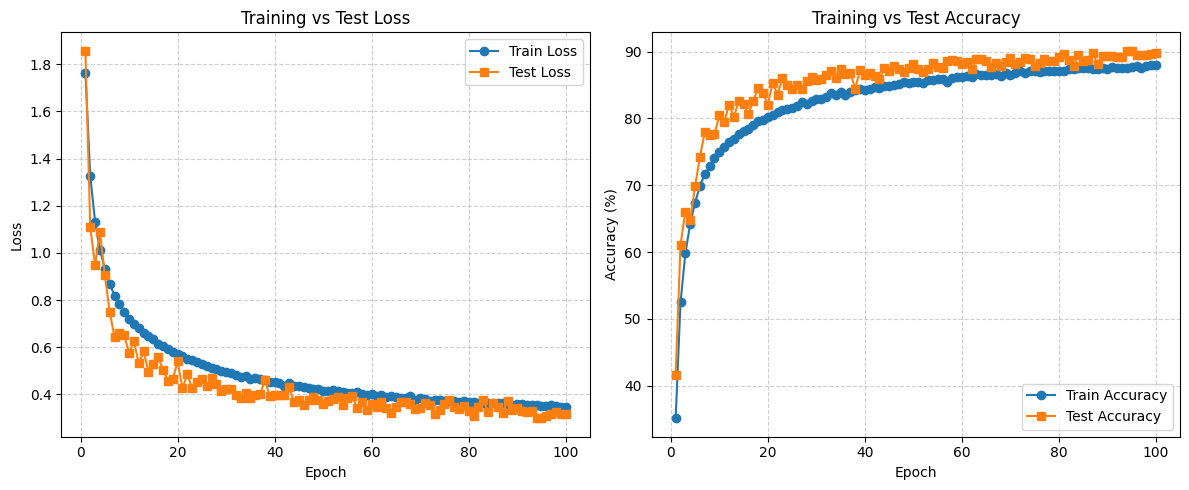

In [7]:
helper.plot_metrics(fp32_metrics)

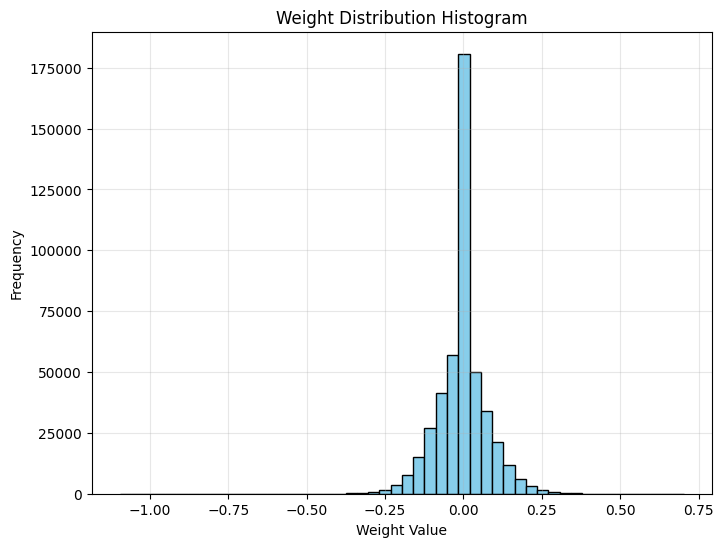

In [8]:
helper.plot_weight_histogram(model_fp32)

## Pruning

In [9]:
model = get_model()
model.load_model(f"{mname}_fp32.pth", device=device)
model.train()

Model loaded from resnet_fp32.pth


ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=

In [10]:
import copy
import torch.nn.utils.prune as prune

prune_levels = [(0.1,'10'), (0.3,'30'), (0.5,'50'), (0.7,'70')]
results = []

best = 0.0
best_name = ""

for p, pname in prune_levels:
    m = copy.deepcopy(model)

    parameters_to_prune = []
    for module in m.modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
            parameters_to_prune.append((module, "weight"))

    prune.global_unstructured(
        parameters_to_prune,
        pruning_method=prune.L1Unstructured,
        amount=p
    )

    # fine-tune
    metrics = helper.train_model(model=m,train_loader=train_loader,test_loader=test_loader,device=device)

    # remove pruning masks
    for module in m.modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
            prune.remove(module, "weight")

    percent = p * 100
    fname = f"{mname}_{pname}.pth"
    # m.save_model(fname)
    torch.save(model_fp32.state_dict(), fname)
    
    acc = helper.evaluate(m,test_loader,device)
    if acc > best:
        best = acc
        best_name = fname

    results.append((p, metrics))

Epoch [1/10] 

Train Loss: 0.3479, Train Acc: 87.95% 

Test/Val Loss: 0.3049, Test/Val Acc: 90.26%
Epoch [2/10] 

Train Loss: 0.3456, Train Acc: 87.90% 

Test/Val Loss: 0.3125, Test/Val Acc: 89.93%
Epoch [3/10] 

Train Loss: 0.3462, Train Acc: 87.84% 

Test/Val Loss: 0.3207, Test/Val Acc: 89.52%
Epoch [4/10] 

Train Loss: 0.3453, Train Acc: 87.97% 

Test/Val Loss: 0.3118, Test/Val Acc: 90.07%
Epoch [5/10] 

Train Loss: 0.3433, Train Acc: 88.07% 

Test/Val Loss: 0.3234, Test/Val Acc: 89.49%
Epoch [6/10] 

Train Loss: 0.3449, Train Acc: 87.93% 

Test/Val Loss: 0.3411, Test/Val Acc: 89.01%
Epoch [7/10] 

Train Loss: 0.3397, Train Acc: 88.02% 

Test/Val Loss: 0.3421, Test/Val Acc: 88.59%
Epoch [8/10] 

Train Loss: 0.3406, Train Acc: 88.12% 

Test/Val Loss: 0.3193, Test/Val Acc: 89.89%
Epoch [9/10] 

Train Loss: 0.3387, Train Acc: 88.17% 

Test/Val Loss: 0.3082, Test/Val Acc: 90.01%
Epoch [10/10] 

Train Loss: 0.3368, Train Acc: 88.36% 

Test/Val Loss: 0.3777, Test/Val Acc: 87.90%


Epoch [1/10] 

Train Loss: 0.3449, Train Acc: 87.91% 

Test/Val Loss: 0.3054, Test/Val Acc: 90.05%
Epoch [2/10] 

Train Loss: 0.3454, Train Acc: 87.96% 

Test/Val Loss: 0.3101, Test/Val Acc: 89.69%
Epoch [3/10] 

Train Loss: 0.3369, Train Acc: 88.37% 

Test/Val Loss: 0.3823, Test/Val Acc: 88.20%
Epoch [4/10] 

Train Loss: 0.3353, Train Acc: 88.33% 

Test/Val Loss: 0.3015, Test/Val Acc: 90.38%
Epoch [5/10] 

Train Loss: 0.3416, Train Acc: 88.16% 

Test/Val Loss: 0.3218, Test/Val Acc: 89.62%
Epoch [6/10] 

Train Loss: 0.3345, Train Acc: 88.48% 

Test/Val Loss: 0.3344, Test/Val Acc: 89.38%
Epoch [7/10] 

Train Loss: 0.3457, Train Acc: 88.02% 

Test/Val Loss: 0.3644, Test/Val Acc: 88.60%
Epoch [8/10] 

Train Loss: 0.3368, Train Acc: 88.23% 

Test/Val Loss: 0.3322, Test/Val Acc: 89.21%
Epoch [9/10] 

Train Loss: 0.3355, Train Acc: 88.35% 

Test/Val Loss: 0.3216, Test/Val Acc: 89.94%
Epoch [10/10] 

Train Loss: 0.3343, Train Acc: 88.31% 

Test/Val Loss: 0.3065, Test/Val Acc: 89.97%


Epoch [1/10] 

Train Loss: 0.3303, Train Acc: 88.63% 

Test/Val Loss: 0.2848, Test/Val Acc: 90.62%
Epoch [2/10] 

Train Loss: 0.3229, Train Acc: 88.69% 

Test/Val Loss: 0.2862, Test/Val Acc: 90.54%
Epoch [3/10] 

Train Loss: 0.3198, Train Acc: 88.77% 

Test/Val Loss: 0.3022, Test/Val Acc: 90.41%
Epoch [4/10] 

Train Loss: 0.3171, Train Acc: 88.89% 

Test/Val Loss: 0.3122, Test/Val Acc: 90.11%
Epoch [5/10] 

Train Loss: 0.3155, Train Acc: 88.90% 

Test/Val Loss: 0.2848, Test/Val Acc: 90.84%
Epoch [6/10] 

Train Loss: 0.3186, Train Acc: 88.85% 

Test/Val Loss: 0.3779, Test/Val Acc: 87.92%
Epoch [7/10] 

Train Loss: 0.3189, Train Acc: 88.73% 

Test/Val Loss: 0.3016, Test/Val Acc: 90.16%
Epoch [8/10] 

Train Loss: 0.3097, Train Acc: 89.10% 

Test/Val Loss: 0.3223, Test/Val Acc: 90.04%
Epoch [9/10] 

Train Loss: 0.3120, Train Acc: 88.96% 

Test/Val Loss: 0.3084, Test/Val Acc: 90.24%
Epoch [10/10] 

Train Loss: 0.3147, Train Acc: 89.13% 

Test/Val Loss: 0.2860, Test/Val Acc: 90.59%


Epoch [1/10] 

Train Loss: 0.3456, Train Acc: 87.89% 

Test/Val Loss: 0.2807, Test/Val Acc: 90.65%
Epoch [2/10] 

Train Loss: 0.3261, Train Acc: 88.73% 

Test/Val Loss: 0.2766, Test/Val Acc: 91.14%
Epoch [3/10] 

Train Loss: 0.3176, Train Acc: 88.94% 

Test/Val Loss: 0.3034, Test/Val Acc: 90.20%
Epoch [4/10] 

Train Loss: 0.3153, Train Acc: 89.02% 

Test/Val Loss: 0.2941, Test/Val Acc: 90.27%
Epoch [5/10] 

Train Loss: 0.3104, Train Acc: 89.07% 

Test/Val Loss: 0.2919, Test/Val Acc: 90.20%
Epoch [6/10] 

Train Loss: 0.3114, Train Acc: 89.21% 

Test/Val Loss: 0.2972, Test/Val Acc: 90.34%
Epoch [7/10] 

Train Loss: 0.3061, Train Acc: 89.31% 

Test/Val Loss: 0.3012, Test/Val Acc: 90.20%
Epoch [8/10] 

Train Loss: 0.3051, Train Acc: 89.31% 

Test/Val Loss: 0.2814, Test/Val Acc: 90.71%
Epoch [9/10] 

Train Loss: 0.3044, Train Acc: 89.48% 

Test/Val Loss: 0.3221, Test/Val Acc: 89.83%
Epoch [10/10] 

Train Loss: 0.3044, Train Acc: 89.39% 

Test/Val Loss: 0.2716, Test/Val Acc: 91.00%


Metrics for pruning with p=0.1


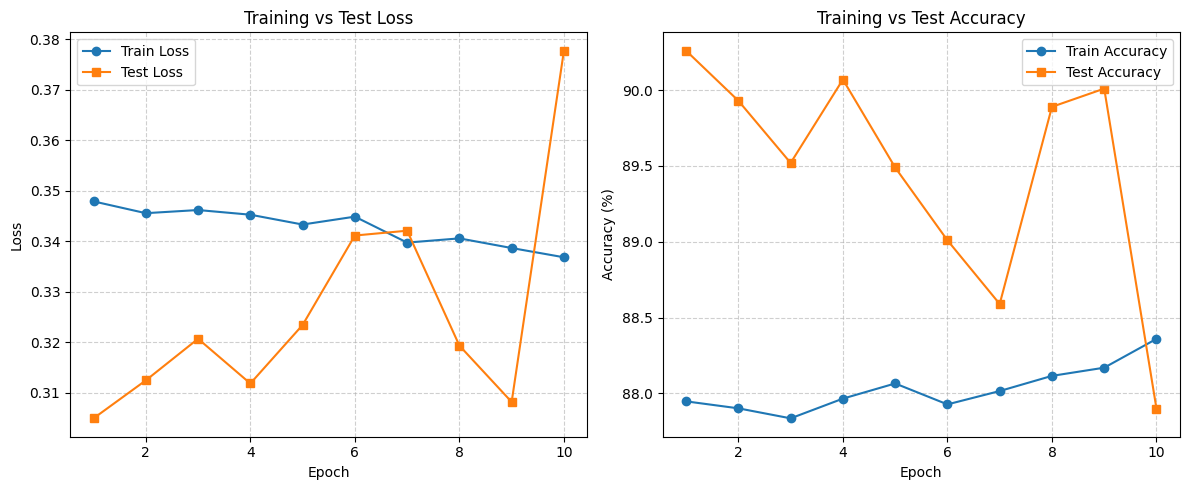

Metrics for pruning with p=0.3


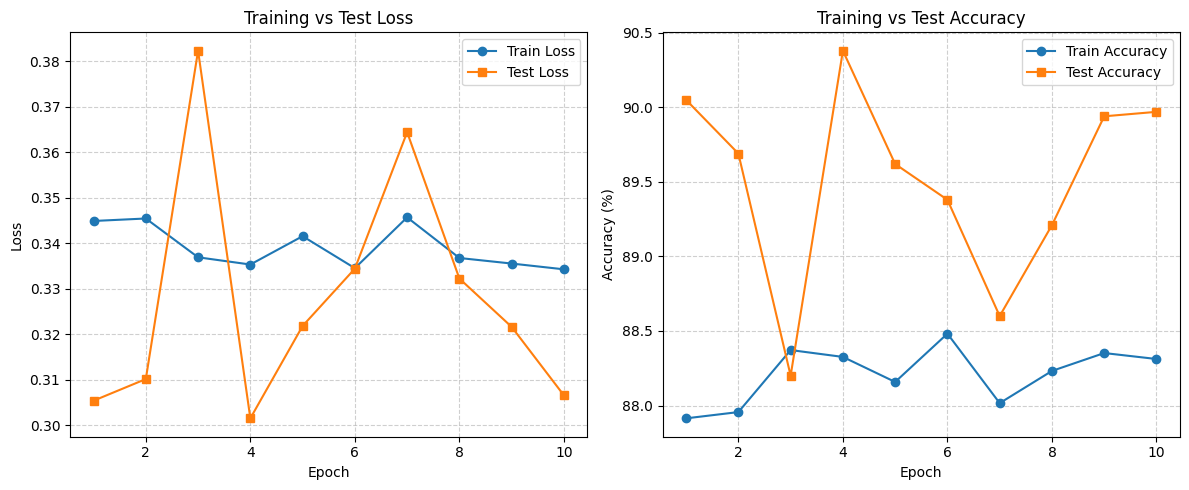

Metrics for pruning with p=0.5


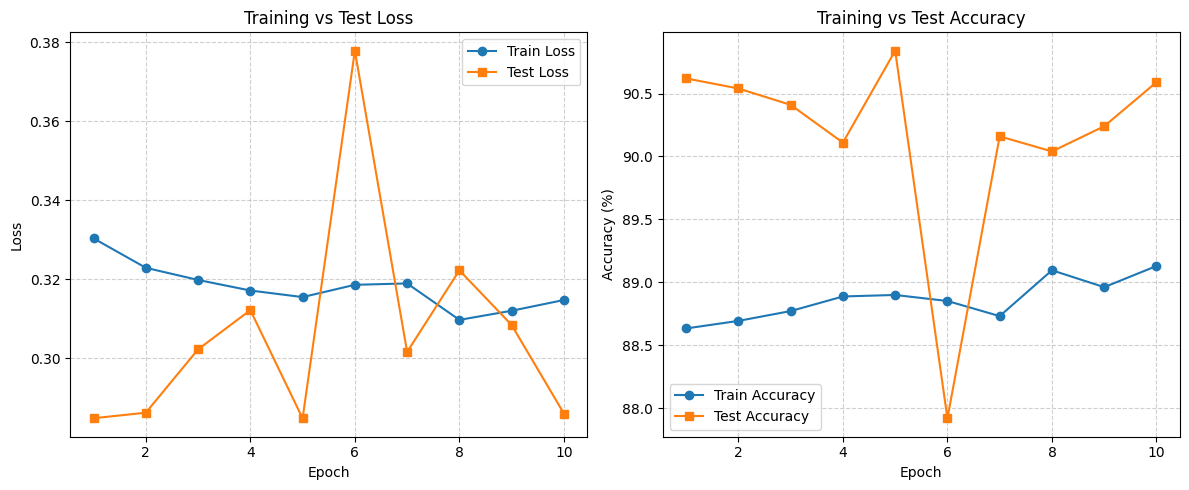

Metrics for pruning with p=0.7


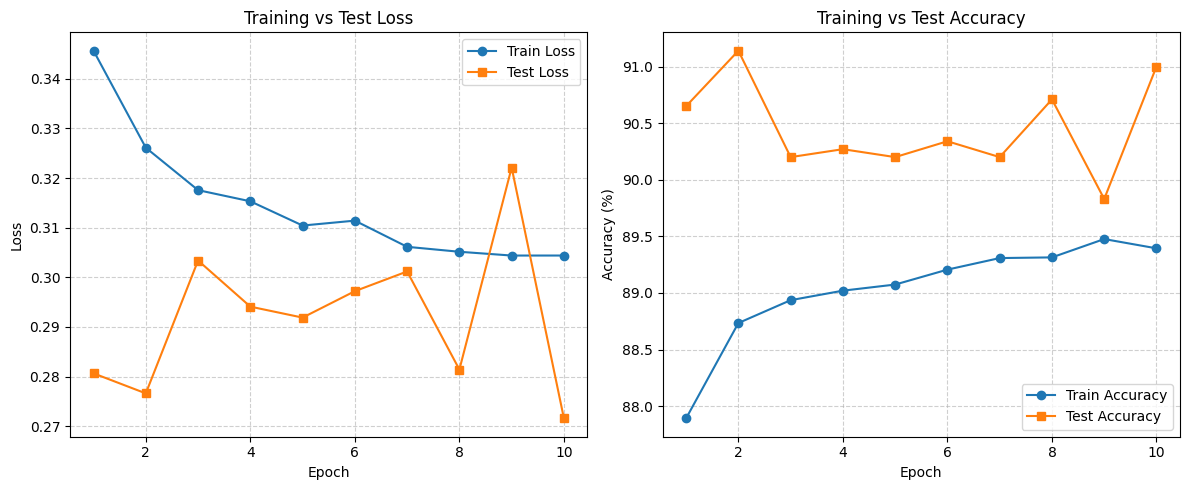

In [11]:
for p, metrics in results:
    print(f"Metrics for pruning with p={p}")
    helper.plot_metrics(metrics)

## Quantization Aware Training

In [12]:
import torch
from torch.ao.quantization import get_default_qat_qconfig
from torch.ao.quantization.quantize_fx import prepare_qat_fx, convert_fx

model_qat = get_model_qat()
# model_qat.load_model(best_name, device='cpu')
state_dict = torch.load(best_name)
model_fp32.load_state_dict(state_dict)
model_qat.eval()

# example input for FX tracing
example_inputs = (torch.randn(1, 3, 32, 32, device='cpu'),)

# QAT config dictionary, default 8-bit symmetric QAT
qconfig_dict = {"": get_default_qat_qconfig('fbgemm')}

# prepare the model for QAT
model_qat_prepared = prepare_qat_fx(model_qat, qconfig_dict, example_inputs=example_inputs)

model_qat_prepared.to(device)
model_qat_prepared.train()

/tmp/SLURM_5271096/ipykernel_1841988/2910714172.py:18: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  model_qat_prepared = prepare_qat_fx(model_qat, qconfig_dict, example_inputs=example_inputs)
/home1/kodachi/.conda/envs/ee599/lib/python3.12/site-packages/torch/ao/quantization/quantize_fx.py:146: FutureWarning: Passing a QConfig dictionary to prepare is deprecated and wil

GraphModule(
  (activation_post_process_0): FusedMovingAvgObsFakeQuantize(
    fake_quant_enabled=tensor([1], device='cuda:0'), observer_enabled=tensor([1], device='cuda:0'), scale=tensor([1.], device='cuda:0'), zero_point=tensor([0], device='cuda:0', dtype=torch.int32), dtype=torch.quint8, quant_min=0, quant_max=127, qscheme=torch.per_tensor_affine, reduce_range=True
    (activation_post_process): MovingAverageMinMaxObserver(min_val=inf, max_val=-inf)
  )
  (conv1): ConvBnReLU2d(
    3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
    (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (weight_fake_quant): FusedMovingAvgObsFakeQuantize(
      fake_quant_enabled=tensor([1], device='cuda:0'), observer_enabled=tensor([1], device='cuda:0'), scale=tensor([1.], device='cuda:0'), zero_point=tensor([0], device='cuda:0', dtype=torch.int32), dtype=torch.qint8, quant_min=-128, quant_max=127, qscheme=torch.per_channel_symmetric, reduce_ra

In [13]:
qat_metrics = helper.train_model(model=model_qat_prepared,train_loader=train_loader,test_loader=test_loader,device=device,epochs=20)

Epoch [1/20] 

Train Loss: 1.7984, Train Acc: 33.16% 

Test/Val Loss: 1.9559, Test/Val Acc: 40.77%
Epoch [2/20] 

Train Loss: 1.3569, Train Acc: 51.37% 

Test/Val Loss: 1.2601, Test/Val Acc: 55.98%
Epoch [3/20] 

Train Loss: 1.1495, Train Acc: 59.30% 

Test/Val Loss: 1.1926, Test/Val Acc: 64.24%
Epoch [4/20] 

Train Loss: 1.0185, Train Acc: 64.13% 

Test/Val Loss: 0.9160, Test/Val Acc: 69.02%
Epoch [5/20] 

Train Loss: 0.9350, Train Acc: 67.05% 

Test/Val Loss: 0.7944, Test/Val Acc: 71.47%
Epoch [6/20] 

Train Loss: 0.8726, Train Acc: 69.30% 

Test/Val Loss: 1.1331, Test/Val Acc: 66.10%
Epoch [7/20] 

Train Loss: 0.8201, Train Acc: 71.40% 

Test/Val Loss: 0.7670, Test/Val Acc: 74.41%
Epoch [8/20] 

Train Loss: 0.7840, Train Acc: 72.80% 

Test/Val Loss: 0.7487, Test/Val Acc: 74.87%
Epoch [9/20] 

Train Loss: 0.7511, Train Acc: 73.87% 

Test/Val Loss: 0.6188, Test/Val Acc: 78.88%
Epoch [10/20] 

Train Loss: 0.7288, Train Acc: 74.56% 

Test/Val Loss: 0.6139, Test/Val Acc: 78.54%
Epoch [11/20] 

Train Loss: 0.7016, Train Acc: 75.65% 

Test/Val Loss: 0.5907, Test/Val Acc: 80.15%
Epoch [12/20] 

Train Loss: 0.6791, Train Acc: 76.42% 

Test/Val Loss: 0.6003, Test/Val Acc: 79.56%
Epoch [13/20] 

Train Loss: 0.6688, Train Acc: 76.90% 

Test/Val Loss: 0.6356, Test/Val Acc: 78.74%
Epoch [14/20] 

Train Loss: 0.6539, Train Acc: 77.32% 

Test/Val Loss: 0.5422, Test/Val Acc: 81.25%
Epoch [15/20] 

Train Loss: 0.6329, Train Acc: 77.93% 

Test/Val Loss: 0.6422, Test/Val Acc: 79.21%
Epoch [16/20] 

Train Loss: 0.6284, Train Acc: 78.22% 

Test/Val Loss: 0.5613, Test/Val Acc: 80.89%
Epoch [17/20] 

Train Loss: 0.6124, Train Acc: 78.49% 

Test/Val Loss: 0.5093, Test/Val Acc: 82.73%
Epoch [18/20] 

Train Loss: 0.5994, Train Acc: 79.11% 

Test/Val Loss: 0.5181, Test/Val Acc: 82.01%
Epoch [19/20] 

Train Loss: 0.5942, Train Acc: 79.35% 

Test/Val Loss: 0.5218, Test/Val Acc: 82.09%
Epoch [20/20] 

Train Loss: 0.5802, Train Acc: 79.97% 

Test/Val Loss: 0.4616, Test/Val Acc: 84.18%


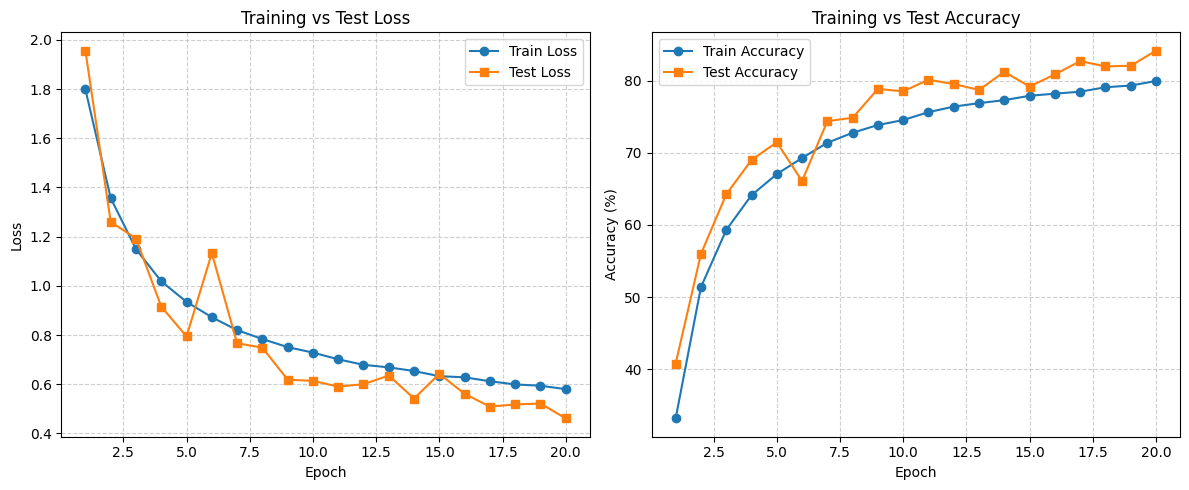

In [14]:
helper.plot_metrics(qat_metrics)

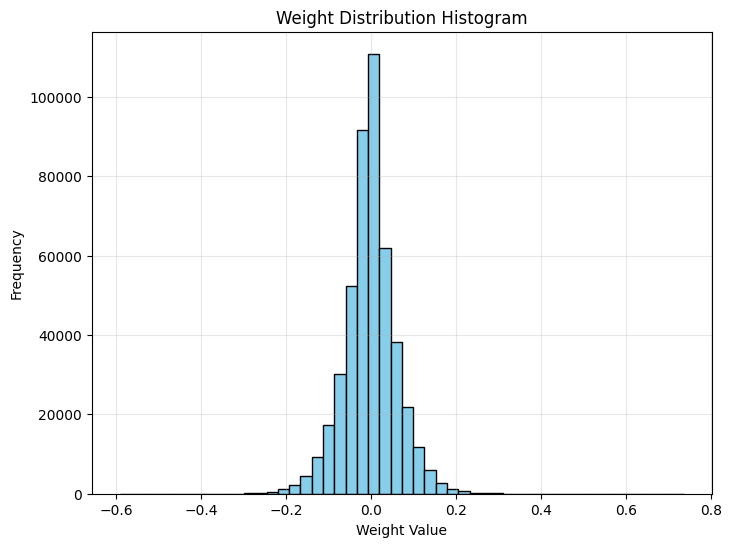

In [15]:
helper.plot_weight_histogram(model_qat_prepared)

In [16]:
model_qat_prepared.eval()
torch.save(model_qat_prepared.state_dict(), f"{mname}_qat_preconvert.pth")
# model_int8 = convert_fx(model_qat_prepared.cpu())
# torch.save(model_int8.state_dict(), "squeezenet_int8_qat.pth")